In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import lightgbm
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score

In [48]:
df = pd.read_csv('downloaded_from_mendeley/weaving_rejection_dataset - original.csv')

In [49]:
df.head()

,Construction,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Previous_pdn,Req_grey_fabric,Req_beam_length(yds),Total_Pdn(yds),Rejection,warp_count,weft_count,epi,ppi
0,40+40/2/40/110x80,31300.0,6.0,38286.9360,12.5,TOTAL,33297.872340,34797.651103,27646.0,285,double_40,80.0,110,80
1,40x40/110x90,10450.0,7.0,13057.5840,14.5,TOTAL,11236.559140,12017.350432,11019.0,39,40,40.0,110,90
2,40x40/110x80,900.0,11.5,1902.8640,12.5,TOTAL,1016.949153,1062.753843,1528.0,0,40,40.0,110,80
3,40x40/130x80,8000.0,8.0,10093.9280,14.0,TOTAL,8695.652174,9245.815159,8944.0,58,40,40.0,130,80
4,50x50/140x70,3500.0,8.1,69146.1408,9.1,TOTAL,3808.487486,3831.158751,59367.0,1043,50,50.0,140,70


In [50]:
#selecting only the required columns
df= df[['Req_Finish_Fabrics', 'Fabric_Allowance','Rec_Beam_length(yds)', 'Shrink_allow', 'Req_grey_fabric', 
    'Req_beam_length(yds)', 'Total_Pdn(yds)',
       'Rejection', 'warp_count',  'weft_count',
       'epi', 'ppi']]

In [51]:
df.head()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),Total_Pdn(yds),Rejection,warp_count,weft_count,epi,ppi
0,31300.0,6.0,38286.9360,12.5,33297.872340,34797.651103,27646.0,285,double_40,80.0,110,80
1,10450.0,7.0,13057.5840,14.5,11236.559140,12017.350432,11019.0,39,40,40.0,110,90
2,900.0,11.5,1902.8640,12.5,1016.949153,1062.753843,1528.0,0,40,40.0,110,80
3,8000.0,8.0,10093.9280,14.0,8695.652174,9245.815159,8944.0,58,40,40.0,130,80
4,3500.0,8.1,69146.1408,9.1,3808.487486,3831.158751,59367.0,1043,50,50.0,140,70


In [52]:
df[['warp_count', 'weft_count', 'epi', 'ppi']]= df[['warp_count', 'weft_count', 'epi', 'ppi']].astype(str)

In [53]:
df.select_dtypes('O').head()

,warp_count,weft_count,epi,ppi
0,double_40,80.0,110,80
1,40,40.0,110,90
2,40,40.0,110,80
3,40,40.0,130,80
4,50,50.0,140,70


In [54]:
X = df.copy()
y = X.pop('Rejection')

In [55]:
X.head()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),Total_Pdn(yds),warp_count,weft_count,epi,ppi
0,31300.0,6.0,38286.9360,12.5,33297.872340,34797.651103,27646.0,double_40,80.0,110,80
1,10450.0,7.0,13057.5840,14.5,11236.559140,12017.350432,11019.0,40,40.0,110,90
2,900.0,11.5,1902.8640,12.5,1016.949153,1062.753843,1528.0,40,40.0,110,80
3,8000.0,8.0,10093.9280,14.0,8695.652174,9245.815159,8944.0,40,40.0,130,80
4,3500.0,8.1,69146.1408,9.1,3808.487486,3831.158751,59367.0,50,50.0,140,70


In [56]:
y.head()

0     285
1      39
2       0
3      58
4    1043
Name: Rejection, dtype: int64

In [57]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
std = StandardScaler()

In [60]:
X_train_sc = pd.DataFrame(std.fit_transform(X_train.select_dtypes(exclude=['O'])), 
             columns= X_train.select_dtypes(exclude=['O']).columns)

In [61]:
X_train.shape, X_train_sc.shape

((15407, 11), (15407, 7))

In [62]:
X_test_sc = pd.DataFrame(std.transform(X_test.select_dtypes(exclude=['O'])), columns=X_test.select_dtypes(exclude='O').columns)

In [63]:
X_train_sc.index = X_train.index
X_test_sc.index = X_test.index

In [64]:
from sklearn.preprocessing import OneHotEncoder

In [65]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [66]:
X_train_ohe= ohe.fit_transform(X_train.select_dtypes('O'))
X_test_ohe = ohe.transform(X_test.select_dtypes('O'))

In [67]:
X_train_ohe_df = pd.DataFrame(X_train_ohe.toarray(), columns=ohe.get_feature_names_out() )
X_test_ohe_df = pd.DataFrame(X_test_ohe.toarray(), columns=ohe.get_feature_names_out() )

In [68]:
X_train_ohe_df.index = X_train.index
X_test_ohe_df.index = X_test.index

In [69]:
X_train_ok = pd.concat([X_train.select_dtypes(exclude='O'), X_train_ohe_df], axis=1)
X_test_ok = pd.concat([X_test.select_dtypes(exclude='O'), X_test_ohe_df], axis=1)

In [70]:
X_train_ok.shape, X_test_ok.shape

((15407, 65), (6603, 65))

In [34]:
# X_train_ok.tail()

In [71]:
#models
models = {'rnf': RandomForestRegressor() , 'cat': CatBoostRegressor(), 'light_gbm': lightgbm.LGBMRegressor(), 
          'xgboost': XGBRegressor(), 'lr': LinearRegression(), 'laso': Lasso(), 'elastonet': ElasticNet(),
         'elastonet_cv': ElasticNetCV(), 'ridge': Ridge(), 'decision_tree': DecisionTreeRegressor(),
          'knn': KNeighborsRegressor(), 'adaboost': AdaBoostRegressor(), 'svm': SVR()   } 

# r2 score calcuation

In [26]:
from sklearn.metrics import r2_score
def calculate_r2_score(models, X_train, y_train, X_test):
    r2_dict ={}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2_score_ = r2_score(y_test, y_pred)
        r2_dict[model_name] = r2_score_
    return r2_dict

In [32]:
r2_dict_df=calculate_r2_score(models, X_train_ok, y_train, X_test_ok)

Learning rate set to 0.063072
0:	learn: 158.7178955	total: 9.65ms	remaining: 9.64s
1:	learn: 151.5926185	total: 14.8ms	remaining: 7.37s
2:	learn: 145.2503260	total: 18.3ms	remaining: 6.1s
3:	learn: 138.9749667	total: 21.7ms	remaining: 5.41s
4:	learn: 133.3804037	total: 24.6ms	remaining: 4.89s
5:	learn: 128.0819037	total: 27.2ms	remaining: 4.51s
6:	learn: 123.0510303	total: 29.8ms	remaining: 4.23s
7:	learn: 118.3194970	total: 32.7ms	remaining: 4.06s
8:	learn: 114.1136154	total: 35.4ms	remaining: 3.89s
9:	learn: 110.1085814	total: 38.1ms	remaining: 3.77s
10:	learn: 106.6755173	total: 40.6ms	remaining: 3.65s
11:	learn: 103.3457690	total: 44.9ms	remaining: 3.69s
12:	learn: 100.1696972	total: 52.3ms	remaining: 3.97s
13:	learn: 97.2254916	total: 56.8ms	remaining: 4s
14:	learn: 94.5826790	total: 60.2ms	remaining: 3.95s
15:	learn: 92.0164696	total: 63.2ms	remaining: 3.89s
16:	learn: 89.7388333	total: 66.4ms	remaining: 3.84s
17:	learn: 87.6168816	total: 69.2ms	remaining: 3.77s
18:	learn: 85.678

193:	learn: 51.7631532	total: 581ms	remaining: 2.42s
194:	learn: 51.7274719	total: 587ms	remaining: 2.42s
195:	learn: 51.6658894	total: 591ms	remaining: 2.42s
196:	learn: 51.6478772	total: 595ms	remaining: 2.43s
197:	learn: 51.6325141	total: 598ms	remaining: 2.42s
198:	learn: 51.5985117	total: 601ms	remaining: 2.42s
199:	learn: 51.4351167	total: 604ms	remaining: 2.42s
200:	learn: 51.4039849	total: 606ms	remaining: 2.41s
201:	learn: 51.2528953	total: 609ms	remaining: 2.41s
202:	learn: 51.2122986	total: 611ms	remaining: 2.4s
203:	learn: 51.1808586	total: 614ms	remaining: 2.39s
204:	learn: 51.1248780	total: 616ms	remaining: 2.39s
205:	learn: 51.1001660	total: 619ms	remaining: 2.39s
206:	learn: 51.0689523	total: 622ms	remaining: 2.38s
207:	learn: 51.0445450	total: 627ms	remaining: 2.39s
208:	learn: 51.0277160	total: 631ms	remaining: 2.39s
209:	learn: 50.9668187	total: 634ms	remaining: 2.38s
210:	learn: 50.9211045	total: 637ms	remaining: 2.38s
211:	learn: 50.8901076	total: 639ms	remaining: 

406:	learn: 45.7243242	total: 1.2s	remaining: 1.75s
407:	learn: 45.7106679	total: 1.21s	remaining: 1.76s
408:	learn: 45.6944528	total: 1.22s	remaining: 1.76s
409:	learn: 45.6875918	total: 1.22s	remaining: 1.75s
410:	learn: 45.6781107	total: 1.22s	remaining: 1.75s
411:	learn: 45.6597597	total: 1.23s	remaining: 1.75s
412:	learn: 45.6437343	total: 1.23s	remaining: 1.74s
413:	learn: 45.6258108	total: 1.23s	remaining: 1.74s
414:	learn: 45.6151527	total: 1.23s	remaining: 1.74s
415:	learn: 45.5928844	total: 1.24s	remaining: 1.74s
416:	learn: 45.5828669	total: 1.24s	remaining: 1.73s
417:	learn: 45.5738023	total: 1.24s	remaining: 1.73s
418:	learn: 45.5582790	total: 1.25s	remaining: 1.73s
419:	learn: 45.5417685	total: 1.25s	remaining: 1.73s
420:	learn: 45.5321630	total: 1.25s	remaining: 1.72s
421:	learn: 45.5191661	total: 1.26s	remaining: 1.72s
422:	learn: 45.5106411	total: 1.26s	remaining: 1.72s
423:	learn: 45.4127167	total: 1.26s	remaining: 1.71s
424:	learn: 45.3959017	total: 1.26s	remaining: 

613:	learn: 42.9015170	total: 1.81s	remaining: 1.14s
614:	learn: 42.8932379	total: 1.81s	remaining: 1.14s
615:	learn: 42.8842346	total: 1.82s	remaining: 1.13s
616:	learn: 42.8801992	total: 1.83s	remaining: 1.14s
617:	learn: 42.8638349	total: 1.83s	remaining: 1.13s
618:	learn: 42.8457115	total: 1.84s	remaining: 1.13s
619:	learn: 42.8327684	total: 1.84s	remaining: 1.13s
620:	learn: 42.8247415	total: 1.84s	remaining: 1.12s
621:	learn: 42.8218180	total: 1.84s	remaining: 1.12s
622:	learn: 42.8146392	total: 1.85s	remaining: 1.12s
623:	learn: 42.8098853	total: 1.85s	remaining: 1.11s
624:	learn: 42.8017199	total: 1.85s	remaining: 1.11s
625:	learn: 42.7882383	total: 1.85s	remaining: 1.11s
626:	learn: 42.7822668	total: 1.86s	remaining: 1.1s
627:	learn: 42.7787204	total: 1.86s	remaining: 1.1s
628:	learn: 42.7714505	total: 1.86s	remaining: 1.1s
629:	learn: 42.7619576	total: 1.86s	remaining: 1.09s
630:	learn: 42.7538189	total: 1.87s	remaining: 1.09s
631:	learn: 42.7502137	total: 1.87s	remaining: 1.

814:	learn: 41.5792133	total: 2.41s	remaining: 547ms
815:	learn: 41.5763594	total: 2.41s	remaining: 544ms
816:	learn: 41.5703132	total: 2.41s	remaining: 541ms
817:	learn: 41.5665866	total: 2.42s	remaining: 538ms
818:	learn: 41.5602909	total: 2.42s	remaining: 535ms
819:	learn: 41.5576296	total: 2.42s	remaining: 532ms
820:	learn: 41.5551389	total: 2.42s	remaining: 529ms
821:	learn: 41.5497071	total: 2.43s	remaining: 526ms
822:	learn: 41.5451421	total: 2.43s	remaining: 523ms
823:	learn: 41.5334566	total: 2.43s	remaining: 520ms
824:	learn: 41.5295934	total: 2.43s	remaining: 517ms
825:	learn: 41.5258480	total: 2.44s	remaining: 514ms
826:	learn: 41.5232103	total: 2.44s	remaining: 511ms
827:	learn: 41.5160267	total: 2.44s	remaining: 508ms
828:	learn: 41.5149689	total: 2.45s	remaining: 505ms
829:	learn: 41.5074166	total: 2.45s	remaining: 502ms
830:	learn: 41.5019875	total: 2.45s	remaining: 499ms
831:	learn: 41.5004130	total: 2.46s	remaining: 496ms
832:	learn: 41.4981084	total: 2.46s	remaining:

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.631e+07, tolerance: 4.265e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.633e+07, tolerance: 4.265e+04
  model = cd_fast.enet_coordinate_descent(


In [33]:
r2_score_df = pd.DataFrame()
r2_score_df['models']= r2_dict_df.keys()
r2_score_df['r2_scores']= r2_dict_df.values()

In [34]:
r2_score_df.to_csv('r2_score_dataset_5_ohe_sc_no_gr.csv', index = False)

In [35]:
r2_score_df

,models,r2_scores
0,rnf,0.989233
1,cat,0.953169
2,light_gbm,0.938328
3,xgboost,0.988473
4,lr,0.647604
5,laso,0.636383
6,elastonet,0.636230
7,elastonet_cv,0.634109
8,ridge,0.647584
9,decision_tree,0.989988


# CV_scores_only_train

In [74]:
cv_scores = {}
for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train_ok, y_train, cv= kfold)
    cv_scores[name] = cv_results

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Learning rate set to 0.062031
0:	learn: 157.9800461	total: 5.53ms	remaining: 5.53s
1:	learn: 150.9277871	total: 8.72ms	remaining: 4.35s
2:	learn: 144.7670073	total: 11.6ms	remaining: 3.87s
3:	learn: 138.6553109	total: 14.7ms	remaining: 3.66s
4:	learn: 133.0574627	total: 17.8ms	remaining: 3.54s
5:	learn: 127.8697367	total: 20.3ms	remaining: 3.37s
6:	learn: 122.9550037	total: 23.2ms	remaining: 3.28s
7:	learn: 118.3492764	total: 25.5ms	remaining: 3.16s
8:	learn: 114.1425383	total: 27.8ms	remaining: 3.06s
9:	learn: 110.2393054	total: 30.3ms	remaining: 3s
10:	learn: 106.7461784	total: 32.9ms	remaining: 2.96s
11:	learn: 103.4613052	total: 35.3ms	remaining: 2.91s
12:	learn: 100.3628935	total: 37.9ms	remaining: 2.88s
13:	learn: 97.6380305	total: 42ms	remaining: 2.96s
14:	learn: 94.9964705	total: 45.8ms	remaining: 3s
15:	learn: 92.5436599	total: 51.8ms	remaining: 3.18s
16:	learn: 90.2771970	total: 56.6ms	remaining: 3.27s
17:	learn: 88.1100426	total: 60.1ms	remaining: 3.28s
18:	learn: 86.2377558

215:	learn: 52.4768335	total: 772ms	remaining: 2.8s
216:	learn: 52.4400995	total: 778ms	remaining: 2.81s
217:	learn: 52.4228747	total: 780ms	remaining: 2.8s
218:	learn: 52.3885688	total: 782ms	remaining: 2.79s
219:	learn: 52.3648417	total: 785ms	remaining: 2.78s
220:	learn: 52.3455715	total: 787ms	remaining: 2.77s
221:	learn: 52.3334308	total: 790ms	remaining: 2.77s
222:	learn: 52.2509577	total: 792ms	remaining: 2.76s
223:	learn: 52.2200047	total: 794ms	remaining: 2.75s
224:	learn: 52.1999725	total: 797ms	remaining: 2.74s
225:	learn: 52.1581281	total: 799ms	remaining: 2.73s
226:	learn: 52.1485422	total: 802ms	remaining: 2.73s
227:	learn: 52.1097775	total: 808ms	remaining: 2.73s
228:	learn: 52.0629744	total: 813ms	remaining: 2.74s
229:	learn: 52.0171504	total: 818ms	remaining: 2.74s
230:	learn: 51.9746992	total: 820ms	remaining: 2.73s
231:	learn: 51.9145872	total: 823ms	remaining: 2.72s
232:	learn: 51.8607936	total: 825ms	remaining: 2.72s
233:	learn: 51.8152166	total: 828ms	remaining: 2

386:	learn: 48.2835757	total: 1.36s	remaining: 2.16s
387:	learn: 48.2698572	total: 1.37s	remaining: 2.16s
388:	learn: 48.2616660	total: 1.37s	remaining: 2.15s
389:	learn: 48.2490181	total: 1.37s	remaining: 2.15s
390:	learn: 48.2319417	total: 1.38s	remaining: 2.14s
391:	learn: 48.2196842	total: 1.38s	remaining: 2.14s
392:	learn: 48.1943209	total: 1.38s	remaining: 2.13s
393:	learn: 48.1892064	total: 1.38s	remaining: 2.13s
394:	learn: 48.1744861	total: 1.39s	remaining: 2.13s
395:	learn: 48.1671546	total: 1.39s	remaining: 2.13s
396:	learn: 48.1579706	total: 1.4s	remaining: 2.13s
397:	learn: 48.1430201	total: 1.4s	remaining: 2.12s
398:	learn: 48.1098288	total: 1.41s	remaining: 2.12s
399:	learn: 48.0906136	total: 1.41s	remaining: 2.12s
400:	learn: 48.0733107	total: 1.42s	remaining: 2.12s
401:	learn: 48.0649282	total: 1.42s	remaining: 2.12s
402:	learn: 48.0542281	total: 1.43s	remaining: 2.11s
403:	learn: 48.0436046	total: 1.43s	remaining: 2.11s
404:	learn: 48.0281142	total: 1.43s	remaining: 2

557:	learn: 46.0914340	total: 1.96s	remaining: 1.55s
558:	learn: 46.0881572	total: 1.96s	remaining: 1.55s
559:	learn: 46.0727737	total: 1.96s	remaining: 1.54s
560:	learn: 46.0705048	total: 1.97s	remaining: 1.54s
561:	learn: 46.0661100	total: 1.97s	remaining: 1.53s
562:	learn: 46.0552393	total: 1.97s	remaining: 1.53s
563:	learn: 46.0466355	total: 1.97s	remaining: 1.53s
564:	learn: 46.0387920	total: 1.98s	remaining: 1.52s
565:	learn: 46.0247517	total: 1.99s	remaining: 1.52s
566:	learn: 46.0146638	total: 1.99s	remaining: 1.52s
567:	learn: 46.0029945	total: 2s	remaining: 1.52s
568:	learn: 45.9984772	total: 2s	remaining: 1.52s
569:	learn: 45.9930827	total: 2.01s	remaining: 1.51s
570:	learn: 45.9848166	total: 2.01s	remaining: 1.51s
571:	learn: 45.9752543	total: 2.01s	remaining: 1.51s
572:	learn: 45.9699216	total: 2.02s	remaining: 1.5s
573:	learn: 45.9663780	total: 2.02s	remaining: 1.5s
574:	learn: 45.9627737	total: 2.02s	remaining: 1.49s
575:	learn: 45.9454829	total: 2.02s	remaining: 1.49s
5

734:	learn: 44.7352136	total: 2.56s	remaining: 924ms
735:	learn: 44.7313184	total: 2.57s	remaining: 921ms
736:	learn: 44.7208014	total: 2.57s	remaining: 917ms
737:	learn: 44.7147947	total: 2.57s	remaining: 913ms
738:	learn: 44.7061886	total: 2.58s	remaining: 910ms
739:	learn: 44.7029407	total: 2.58s	remaining: 906ms
740:	learn: 44.6991115	total: 2.58s	remaining: 902ms
741:	learn: 44.6932985	total: 2.58s	remaining: 898ms
742:	learn: 44.6898821	total: 2.58s	remaining: 894ms
743:	learn: 44.6868336	total: 2.59s	remaining: 890ms
744:	learn: 44.6810811	total: 2.59s	remaining: 887ms
745:	learn: 44.6751169	total: 2.6s	remaining: 884ms
746:	learn: 44.6685676	total: 2.6s	remaining: 882ms
747:	learn: 44.6628076	total: 2.61s	remaining: 878ms
748:	learn: 44.6494854	total: 2.61s	remaining: 875ms
749:	learn: 44.6427060	total: 2.61s	remaining: 871ms
750:	learn: 44.6385112	total: 2.61s	remaining: 867ms
751:	learn: 44.6309279	total: 2.62s	remaining: 863ms
752:	learn: 44.6195739	total: 2.62s	remaining: 8

912:	learn: 43.8937173	total: 3.17s	remaining: 302ms
913:	learn: 43.8839282	total: 3.17s	remaining: 298ms
914:	learn: 43.8803997	total: 3.17s	remaining: 295ms
915:	learn: 43.8782433	total: 3.17s	remaining: 291ms
916:	learn: 43.8733095	total: 3.18s	remaining: 288ms
917:	learn: 43.8717215	total: 3.18s	remaining: 284ms
918:	learn: 43.8633242	total: 3.18s	remaining: 281ms
919:	learn: 43.8604267	total: 3.19s	remaining: 277ms
920:	learn: 43.8557273	total: 3.19s	remaining: 274ms
921:	learn: 43.8535272	total: 3.19s	remaining: 270ms
922:	learn: 43.8518293	total: 3.19s	remaining: 266ms
923:	learn: 43.8486641	total: 3.2s	remaining: 263ms
924:	learn: 43.8471258	total: 3.2s	remaining: 259ms
925:	learn: 43.8324235	total: 3.2s	remaining: 256ms
926:	learn: 43.8295676	total: 3.2s	remaining: 252ms
927:	learn: 43.8273215	total: 3.21s	remaining: 249ms
928:	learn: 43.8245526	total: 3.21s	remaining: 245ms
929:	learn: 43.8230875	total: 3.22s	remaining: 242ms
930:	learn: 43.8203686	total: 3.23s	remaining: 239

118:	learn: 56.3770883	total: 401ms	remaining: 2.97s
119:	learn: 56.2741089	total: 405ms	remaining: 2.97s
120:	learn: 56.1591007	total: 410ms	remaining: 2.98s
121:	learn: 56.1204619	total: 415ms	remaining: 2.99s
122:	learn: 56.0620590	total: 418ms	remaining: 2.98s
123:	learn: 55.9489674	total: 421ms	remaining: 2.97s
124:	learn: 55.9237508	total: 423ms	remaining: 2.96s
125:	learn: 55.8934818	total: 425ms	remaining: 2.95s
126:	learn: 55.8647264	total: 428ms	remaining: 2.94s
127:	learn: 55.8240200	total: 430ms	remaining: 2.93s
128:	learn: 55.6633644	total: 432ms	remaining: 2.92s
129:	learn: 55.5391159	total: 435ms	remaining: 2.91s
130:	learn: 55.3859675	total: 437ms	remaining: 2.9s
131:	learn: 55.3841818	total: 439ms	remaining: 2.88s
132:	learn: 55.3028410	total: 441ms	remaining: 2.87s
133:	learn: 55.2526261	total: 443ms	remaining: 2.87s
134:	learn: 55.1933780	total: 446ms	remaining: 2.85s
135:	learn: 54.9145261	total: 449ms	remaining: 2.85s
136:	learn: 54.8915131	total: 453ms	remaining: 

312:	learn: 46.0341930	total: 1.01s	remaining: 2.22s
313:	learn: 46.0201418	total: 1.01s	remaining: 2.22s
314:	learn: 46.0059054	total: 1.02s	remaining: 2.21s
315:	learn: 45.9854234	total: 1.02s	remaining: 2.21s
316:	learn: 45.9681371	total: 1.02s	remaining: 2.2s
317:	learn: 45.9037612	total: 1.02s	remaining: 2.2s
318:	learn: 45.8806608	total: 1.03s	remaining: 2.19s
319:	learn: 45.8722121	total: 1.03s	remaining: 2.19s
320:	learn: 45.8388794	total: 1.04s	remaining: 2.19s
321:	learn: 45.8164190	total: 1.04s	remaining: 2.2s
322:	learn: 45.7990645	total: 1.05s	remaining: 2.2s
323:	learn: 45.7389819	total: 1.05s	remaining: 2.19s
324:	learn: 45.7210352	total: 1.05s	remaining: 2.19s
325:	learn: 45.6940775	total: 1.05s	remaining: 2.18s
326:	learn: 45.6766498	total: 1.06s	remaining: 2.18s
327:	learn: 45.6660893	total: 1.06s	remaining: 2.17s
328:	learn: 45.6508719	total: 1.07s	remaining: 2.18s
329:	learn: 45.6447398	total: 1.07s	remaining: 2.18s
330:	learn: 45.5915790	total: 1.08s	remaining: 2.1

487:	learn: 42.8889839	total: 1.61s	remaining: 1.69s
488:	learn: 42.8693915	total: 1.61s	remaining: 1.69s
489:	learn: 42.8590469	total: 1.62s	remaining: 1.68s
490:	learn: 42.8464632	total: 1.62s	remaining: 1.68s
491:	learn: 42.8386789	total: 1.62s	remaining: 1.68s
492:	learn: 42.8290905	total: 1.63s	remaining: 1.68s
493:	learn: 42.8167471	total: 1.63s	remaining: 1.67s
494:	learn: 42.8110110	total: 1.64s	remaining: 1.67s
495:	learn: 42.8007263	total: 1.64s	remaining: 1.67s
496:	learn: 42.7860386	total: 1.64s	remaining: 1.66s
497:	learn: 42.7704040	total: 1.64s	remaining: 1.66s
498:	learn: 42.7671851	total: 1.65s	remaining: 1.65s
499:	learn: 42.7566478	total: 1.65s	remaining: 1.65s
500:	learn: 42.7424808	total: 1.65s	remaining: 1.65s
501:	learn: 42.7330981	total: 1.65s	remaining: 1.64s
502:	learn: 42.7264046	total: 1.66s	remaining: 1.64s
503:	learn: 42.7125509	total: 1.66s	remaining: 1.63s
504:	learn: 42.7033582	total: 1.66s	remaining: 1.63s
505:	learn: 42.6898596	total: 1.67s	remaining:

672:	learn: 41.1906127	total: 2.21s	remaining: 1.07s
673:	learn: 41.1880347	total: 2.21s	remaining: 1.07s
674:	learn: 41.1816964	total: 2.22s	remaining: 1.07s
675:	learn: 41.1643899	total: 2.22s	remaining: 1.06s
676:	learn: 41.1598722	total: 2.23s	remaining: 1.06s
677:	learn: 41.1548165	total: 2.23s	remaining: 1.06s
678:	learn: 41.1509795	total: 2.24s	remaining: 1.06s
679:	learn: 41.1475289	total: 2.24s	remaining: 1.05s
680:	learn: 41.1377103	total: 2.25s	remaining: 1.05s
681:	learn: 41.1307938	total: 2.25s	remaining: 1.05s
682:	learn: 41.1256675	total: 2.25s	remaining: 1.04s
683:	learn: 41.1205922	total: 2.25s	remaining: 1.04s
684:	learn: 41.1111895	total: 2.25s	remaining: 1.04s
685:	learn: 41.1085842	total: 2.26s	remaining: 1.03s
686:	learn: 41.1008869	total: 2.26s	remaining: 1.03s
687:	learn: 41.0935233	total: 2.26s	remaining: 1.03s
688:	learn: 41.0900913	total: 2.27s	remaining: 1.02s
689:	learn: 41.0822534	total: 2.27s	remaining: 1.02s
690:	learn: 41.0760067	total: 2.27s	remaining:

846:	learn: 40.1817838	total: 2.8s	remaining: 506ms
847:	learn: 40.1726012	total: 2.81s	remaining: 503ms
848:	learn: 40.1683496	total: 2.81s	remaining: 499ms
849:	learn: 40.1658914	total: 2.81s	remaining: 496ms
850:	learn: 40.1597837	total: 2.81s	remaining: 493ms
851:	learn: 40.1554797	total: 2.82s	remaining: 489ms
852:	learn: 40.1391246	total: 2.82s	remaining: 486ms
853:	learn: 40.1359549	total: 2.82s	remaining: 482ms
854:	learn: 40.1218428	total: 2.82s	remaining: 479ms
855:	learn: 40.1165522	total: 2.83s	remaining: 475ms
856:	learn: 40.1131757	total: 2.83s	remaining: 472ms
857:	learn: 40.1109834	total: 2.83s	remaining: 469ms
858:	learn: 40.1027528	total: 2.83s	remaining: 465ms
859:	learn: 40.0986658	total: 2.84s	remaining: 462ms
860:	learn: 40.0932089	total: 2.85s	remaining: 460ms
861:	learn: 40.0901476	total: 2.85s	remaining: 457ms
862:	learn: 40.0836267	total: 2.86s	remaining: 454ms
863:	learn: 40.0793428	total: 2.86s	remaining: 450ms
864:	learn: 40.0759820	total: 2.87s	remaining: 

56:	learn: 63.8792776	total: 202ms	remaining: 3.34s
57:	learn: 63.6961893	total: 205ms	remaining: 3.32s
58:	learn: 63.5490942	total: 207ms	remaining: 3.3s
59:	learn: 63.4268315	total: 209ms	remaining: 3.28s
60:	learn: 63.3040837	total: 212ms	remaining: 3.26s
61:	learn: 63.1577197	total: 214ms	remaining: 3.24s
62:	learn: 63.0378855	total: 217ms	remaining: 3.23s
63:	learn: 62.9256053	total: 220ms	remaining: 3.22s
64:	learn: 62.8422645	total: 226ms	remaining: 3.25s
65:	learn: 62.7686240	total: 234ms	remaining: 3.31s
66:	learn: 62.6640993	total: 238ms	remaining: 3.32s
67:	learn: 62.5858167	total: 244ms	remaining: 3.34s
68:	learn: 62.4912752	total: 247ms	remaining: 3.33s
69:	learn: 62.2990123	total: 250ms	remaining: 3.32s
70:	learn: 62.1430945	total: 253ms	remaining: 3.32s
71:	learn: 62.0517937	total: 256ms	remaining: 3.3s
72:	learn: 61.9755614	total: 258ms	remaining: 3.28s
73:	learn: 61.8657244	total: 261ms	remaining: 3.26s
74:	learn: 61.6883367	total: 263ms	remaining: 3.24s
75:	learn: 61.

240:	learn: 52.1395179	total: 804ms	remaining: 2.53s
241:	learn: 52.0972790	total: 807ms	remaining: 2.53s
242:	learn: 52.0697226	total: 810ms	remaining: 2.52s
243:	learn: 52.0241330	total: 812ms	remaining: 2.52s
244:	learn: 52.0065550	total: 814ms	remaining: 2.51s
245:	learn: 51.9734951	total: 817ms	remaining: 2.5s
246:	learn: 51.9464565	total: 820ms	remaining: 2.5s
247:	learn: 51.9269947	total: 824ms	remaining: 2.5s
248:	learn: 51.9026010	total: 833ms	remaining: 2.51s
249:	learn: 51.8810032	total: 836ms	remaining: 2.51s
250:	learn: 51.8268491	total: 839ms	remaining: 2.5s
251:	learn: 51.7723567	total: 841ms	remaining: 2.5s
252:	learn: 51.7438164	total: 843ms	remaining: 2.49s
253:	learn: 51.7163600	total: 846ms	remaining: 2.48s
254:	learn: 51.7064618	total: 848ms	remaining: 2.48s
255:	learn: 51.6887318	total: 854ms	remaining: 2.48s
256:	learn: 51.6589311	total: 860ms	remaining: 2.48s
257:	learn: 51.6166018	total: 863ms	remaining: 2.48s
258:	learn: 51.5853123	total: 865ms	remaining: 2.48

418:	learn: 48.3104638	total: 1.4s	remaining: 1.93s
419:	learn: 48.2904543	total: 1.4s	remaining: 1.93s
420:	learn: 48.2754563	total: 1.4s	remaining: 1.93s
421:	learn: 48.2701818	total: 1.4s	remaining: 1.92s
422:	learn: 48.2556928	total: 1.41s	remaining: 1.92s
423:	learn: 48.2328911	total: 1.41s	remaining: 1.91s
424:	learn: 48.2212600	total: 1.41s	remaining: 1.91s
425:	learn: 48.2076830	total: 1.42s	remaining: 1.91s
426:	learn: 48.1822555	total: 1.42s	remaining: 1.91s
427:	learn: 48.1634436	total: 1.43s	remaining: 1.9s
428:	learn: 48.1579467	total: 1.43s	remaining: 1.9s
429:	learn: 48.1413721	total: 1.43s	remaining: 1.9s
430:	learn: 48.1228703	total: 1.43s	remaining: 1.89s
431:	learn: 48.1083578	total: 1.44s	remaining: 1.89s
432:	learn: 48.0967408	total: 1.44s	remaining: 1.88s
433:	learn: 48.0768619	total: 1.44s	remaining: 1.88s
434:	learn: 48.0668200	total: 1.44s	remaining: 1.88s
435:	learn: 48.0619259	total: 1.45s	remaining: 1.87s
436:	learn: 48.0492774	total: 1.45s	remaining: 1.86s


606:	learn: 46.2553718	total: 2s	remaining: 1.3s
607:	learn: 46.2233710	total: 2.01s	remaining: 1.29s
608:	learn: 46.2179466	total: 2.01s	remaining: 1.29s
609:	learn: 46.2147214	total: 2.02s	remaining: 1.29s
610:	learn: 46.2026287	total: 2.02s	remaining: 1.28s
611:	learn: 46.1726594	total: 2.02s	remaining: 1.28s
612:	learn: 46.1621858	total: 2.02s	remaining: 1.28s
613:	learn: 46.1537745	total: 2.03s	remaining: 1.27s
614:	learn: 46.1444060	total: 2.03s	remaining: 1.27s
615:	learn: 46.1348126	total: 2.03s	remaining: 1.27s
616:	learn: 46.1230968	total: 2.03s	remaining: 1.26s
617:	learn: 46.1111824	total: 2.04s	remaining: 1.26s
618:	learn: 46.1063742	total: 2.04s	remaining: 1.25s
619:	learn: 46.1020570	total: 2.04s	remaining: 1.25s
620:	learn: 46.0873801	total: 2.04s	remaining: 1.25s
621:	learn: 46.0848597	total: 2.05s	remaining: 1.24s
622:	learn: 46.0704540	total: 2.05s	remaining: 1.24s
623:	learn: 46.0671071	total: 2.05s	remaining: 1.24s
624:	learn: 46.0567636	total: 2.06s	remaining: 1.2

797:	learn: 44.9720835	total: 2.63s	remaining: 665ms
798:	learn: 44.9617425	total: 2.63s	remaining: 662ms
799:	learn: 44.9533669	total: 2.63s	remaining: 659ms
800:	learn: 44.9509585	total: 2.64s	remaining: 656ms
801:	learn: 44.9488516	total: 2.64s	remaining: 653ms
802:	learn: 44.9407382	total: 2.65s	remaining: 649ms
803:	learn: 44.9352867	total: 2.65s	remaining: 645ms
804:	learn: 44.9305757	total: 2.65s	remaining: 642ms
805:	learn: 44.9284979	total: 2.65s	remaining: 638ms
806:	learn: 44.9228461	total: 2.65s	remaining: 635ms
807:	learn: 44.9154155	total: 2.66s	remaining: 632ms
808:	learn: 44.9110014	total: 2.66s	remaining: 628ms
809:	learn: 44.9034424	total: 2.66s	remaining: 625ms
810:	learn: 44.8962703	total: 2.67s	remaining: 621ms
811:	learn: 44.8922228	total: 2.67s	remaining: 618ms
812:	learn: 44.8886227	total: 2.67s	remaining: 615ms
813:	learn: 44.8821004	total: 2.68s	remaining: 612ms
814:	learn: 44.8642429	total: 2.68s	remaining: 609ms
815:	learn: 44.8618794	total: 2.69s	remaining:

977:	learn: 44.2344653	total: 3.23s	remaining: 72.6ms
978:	learn: 44.2295162	total: 3.23s	remaining: 69.3ms
979:	learn: 44.2277340	total: 3.24s	remaining: 66ms
980:	learn: 44.2255438	total: 3.24s	remaining: 62.8ms
981:	learn: 44.2242888	total: 3.24s	remaining: 59.5ms
982:	learn: 44.2195816	total: 3.25s	remaining: 56.1ms
983:	learn: 44.2164131	total: 3.25s	remaining: 52.8ms
984:	learn: 44.2151332	total: 3.25s	remaining: 49.5ms
985:	learn: 44.2121792	total: 3.25s	remaining: 46.2ms
986:	learn: 44.2085666	total: 3.26s	remaining: 42.9ms
987:	learn: 44.2053850	total: 3.26s	remaining: 39.6ms
988:	learn: 44.1977634	total: 3.26s	remaining: 36.3ms
989:	learn: 44.1963020	total: 3.27s	remaining: 33ms
990:	learn: 44.1920081	total: 3.27s	remaining: 29.7ms
991:	learn: 44.1863667	total: 3.28s	remaining: 26.4ms
992:	learn: 44.1836284	total: 3.28s	remaining: 23.1ms
993:	learn: 44.1819672	total: 3.28s	remaining: 19.8ms
994:	learn: 44.1698542	total: 3.29s	remaining: 16.5ms
995:	learn: 44.1663687	total: 3.

184:	learn: 55.7852460	total: 612ms	remaining: 2.69s
185:	learn: 55.6730369	total: 616ms	remaining: 2.69s
186:	learn: 55.5978824	total: 621ms	remaining: 2.7s
187:	learn: 55.5043164	total: 628ms	remaining: 2.71s
188:	learn: 55.4777949	total: 632ms	remaining: 2.71s
189:	learn: 55.4625410	total: 634ms	remaining: 2.7s
190:	learn: 55.4139359	total: 636ms	remaining: 2.69s
191:	learn: 55.3771382	total: 639ms	remaining: 2.69s
192:	learn: 55.3161914	total: 641ms	remaining: 2.68s
193:	learn: 55.2962626	total: 645ms	remaining: 2.68s
194:	learn: 55.2372922	total: 651ms	remaining: 2.69s
195:	learn: 55.1763642	total: 655ms	remaining: 2.69s
196:	learn: 55.1622081	total: 658ms	remaining: 2.68s
197:	learn: 55.1485227	total: 661ms	remaining: 2.67s
198:	learn: 55.1294770	total: 663ms	remaining: 2.67s
199:	learn: 55.1048036	total: 665ms	remaining: 2.66s
200:	learn: 55.0498260	total: 668ms	remaining: 2.65s
201:	learn: 55.0277579	total: 671ms	remaining: 2.65s
202:	learn: 54.9927922	total: 673ms	remaining: 2

365:	learn: 51.0161145	total: 1.22s	remaining: 2.1s
366:	learn: 51.0023655	total: 1.22s	remaining: 2.1s
367:	learn: 50.9879772	total: 1.23s	remaining: 2.11s
368:	learn: 50.9567936	total: 1.23s	remaining: 2.1s
369:	learn: 50.9356672	total: 1.23s	remaining: 2.1s
370:	learn: 50.9263344	total: 1.24s	remaining: 2.1s
371:	learn: 50.9145770	total: 1.24s	remaining: 2.09s
372:	learn: 50.9040813	total: 1.24s	remaining: 2.09s
373:	learn: 50.8966314	total: 1.24s	remaining: 2.08s
374:	learn: 50.8836281	total: 1.25s	remaining: 2.08s
375:	learn: 50.8645894	total: 1.25s	remaining: 2.07s
376:	learn: 50.8361712	total: 1.25s	remaining: 2.07s
377:	learn: 50.8211513	total: 1.25s	remaining: 2.06s
378:	learn: 50.8076436	total: 1.26s	remaining: 2.06s
379:	learn: 50.7929481	total: 1.26s	remaining: 2.06s
380:	learn: 50.7788200	total: 1.27s	remaining: 2.07s
381:	learn: 50.7644730	total: 1.27s	remaining: 2.06s
382:	learn: 50.7474601	total: 1.28s	remaining: 2.06s
383:	learn: 50.7291219	total: 1.28s	remaining: 2.05

546:	learn: 48.7783424	total: 1.82s	remaining: 1.51s
547:	learn: 48.7676436	total: 1.82s	remaining: 1.5s
548:	learn: 48.7641608	total: 1.82s	remaining: 1.5s
549:	learn: 48.7599239	total: 1.83s	remaining: 1.5s
550:	learn: 48.7549785	total: 1.83s	remaining: 1.49s
551:	learn: 48.7485555	total: 1.83s	remaining: 1.49s
552:	learn: 48.7352717	total: 1.83s	remaining: 1.48s
553:	learn: 48.7236936	total: 1.84s	remaining: 1.48s
554:	learn: 48.7149730	total: 1.84s	remaining: 1.48s
555:	learn: 48.7073173	total: 1.84s	remaining: 1.47s
556:	learn: 48.6844970	total: 1.85s	remaining: 1.47s
557:	learn: 48.6824419	total: 1.85s	remaining: 1.47s
558:	learn: 48.6738144	total: 1.85s	remaining: 1.46s
559:	learn: 48.6633038	total: 1.85s	remaining: 1.46s
560:	learn: 48.6579981	total: 1.86s	remaining: 1.45s
561:	learn: 48.6492079	total: 1.86s	remaining: 1.45s
562:	learn: 48.6470819	total: 1.86s	remaining: 1.45s
563:	learn: 48.6406325	total: 1.86s	remaining: 1.44s
564:	learn: 48.6101824	total: 1.87s	remaining: 1.

726:	learn: 47.4451848	total: 2.44s	remaining: 918ms
727:	learn: 47.4399769	total: 2.45s	remaining: 915ms
728:	learn: 47.4365350	total: 2.45s	remaining: 911ms
729:	learn: 47.4324456	total: 2.45s	remaining: 908ms
730:	learn: 47.4281821	total: 2.46s	remaining: 904ms
731:	learn: 47.4219587	total: 2.46s	remaining: 901ms
732:	learn: 47.4179968	total: 2.46s	remaining: 897ms
733:	learn: 47.4142378	total: 2.46s	remaining: 893ms
734:	learn: 47.4064699	total: 2.47s	remaining: 890ms
735:	learn: 47.4007755	total: 2.47s	remaining: 886ms
736:	learn: 47.3979157	total: 2.48s	remaining: 884ms
737:	learn: 47.3935555	total: 2.48s	remaining: 882ms
738:	learn: 47.3888182	total: 2.49s	remaining: 879ms
739:	learn: 47.3814953	total: 2.49s	remaining: 875ms
740:	learn: 47.3748881	total: 2.49s	remaining: 872ms
741:	learn: 47.3698928	total: 2.5s	remaining: 868ms
742:	learn: 47.3659530	total: 2.5s	remaining: 865ms
743:	learn: 47.3643926	total: 2.5s	remaining: 861ms
744:	learn: 47.3624072	total: 2.5s	remaining: 857

890:	learn: 46.6724441	total: 3.05s	remaining: 373ms
891:	learn: 46.6695851	total: 3.05s	remaining: 369ms
892:	learn: 46.6619628	total: 3.05s	remaining: 366ms
893:	learn: 46.6577859	total: 3.05s	remaining: 362ms
894:	learn: 46.6562723	total: 3.06s	remaining: 359ms
895:	learn: 46.6538759	total: 3.06s	remaining: 355ms
896:	learn: 46.6508994	total: 3.06s	remaining: 352ms
897:	learn: 46.6491075	total: 3.07s	remaining: 349ms
898:	learn: 46.6469341	total: 3.08s	remaining: 346ms
899:	learn: 46.6437299	total: 3.08s	remaining: 342ms
900:	learn: 46.6402035	total: 3.08s	remaining: 339ms
901:	learn: 46.6361235	total: 3.08s	remaining: 335ms
902:	learn: 46.6337954	total: 3.09s	remaining: 332ms
903:	learn: 46.6290172	total: 3.09s	remaining: 328ms
904:	learn: 46.6240066	total: 3.09s	remaining: 325ms
905:	learn: 46.6216131	total: 3.1s	remaining: 321ms
906:	learn: 46.6197146	total: 3.1s	remaining: 318ms
907:	learn: 46.6150188	total: 3.1s	remaining: 314ms
908:	learn: 46.6134850	total: 3.1s	remaining: 311

52:	learn: 63.7105293	total: 204ms	remaining: 3.64s
53:	learn: 63.5451441	total: 206ms	remaining: 3.61s
54:	learn: 63.3921660	total: 209ms	remaining: 3.58s
55:	learn: 63.2448075	total: 211ms	remaining: 3.56s
56:	learn: 63.0051557	total: 213ms	remaining: 3.53s
57:	learn: 62.8823105	total: 216ms	remaining: 3.5s
58:	learn: 62.6270973	total: 218ms	remaining: 3.48s
59:	learn: 62.5232946	total: 220ms	remaining: 3.45s
60:	learn: 62.4143812	total: 223ms	remaining: 3.43s
61:	learn: 62.2991734	total: 225ms	remaining: 3.41s
62:	learn: 62.0620274	total: 228ms	remaining: 3.38s
63:	learn: 61.9601839	total: 230ms	remaining: 3.36s
64:	learn: 61.8780418	total: 233ms	remaining: 3.35s
65:	learn: 61.7998494	total: 235ms	remaining: 3.33s
66:	learn: 61.7196673	total: 238ms	remaining: 3.31s
67:	learn: 61.6207696	total: 240ms	remaining: 3.29s
68:	learn: 61.5422005	total: 243ms	remaining: 3.27s
69:	learn: 61.4760348	total: 245ms	remaining: 3.25s
70:	learn: 61.3566149	total: 248ms	remaining: 3.24s
71:	learn: 61

236:	learn: 51.2235167	total: 821ms	remaining: 2.64s
237:	learn: 51.2042340	total: 826ms	remaining: 2.64s
238:	learn: 51.1684088	total: 832ms	remaining: 2.65s
239:	learn: 51.1356963	total: 839ms	remaining: 2.66s
240:	learn: 51.0886045	total: 845ms	remaining: 2.66s
241:	learn: 51.0725912	total: 852ms	remaining: 2.67s
242:	learn: 51.0068199	total: 857ms	remaining: 2.67s
243:	learn: 50.8864015	total: 860ms	remaining: 2.67s
244:	learn: 50.8600018	total: 863ms	remaining: 2.66s
245:	learn: 50.8404563	total: 866ms	remaining: 2.65s
246:	learn: 50.8145398	total: 868ms	remaining: 2.65s
247:	learn: 50.7997567	total: 871ms	remaining: 2.64s
248:	learn: 50.7819189	total: 874ms	remaining: 2.63s
249:	learn: 50.7434805	total: 876ms	remaining: 2.63s
250:	learn: 50.7061484	total: 879ms	remaining: 2.62s
251:	learn: 50.6665466	total: 882ms	remaining: 2.62s
252:	learn: 50.6368030	total: 884ms	remaining: 2.61s
253:	learn: 50.6230441	total: 887ms	remaining: 2.6s
254:	learn: 50.5996018	total: 889ms	remaining: 

396:	learn: 46.9490186	total: 1.43s	remaining: 2.17s
397:	learn: 46.9341171	total: 1.43s	remaining: 2.17s
398:	learn: 46.9044823	total: 1.44s	remaining: 2.16s
399:	learn: 46.8886715	total: 1.45s	remaining: 2.17s
400:	learn: 46.8752259	total: 1.45s	remaining: 2.16s
401:	learn: 46.8629490	total: 1.45s	remaining: 2.16s
402:	learn: 46.8522138	total: 1.45s	remaining: 2.15s
403:	learn: 46.8360927	total: 1.46s	remaining: 2.15s
404:	learn: 46.8209118	total: 1.46s	remaining: 2.15s
405:	learn: 46.8127241	total: 1.47s	remaining: 2.14s
406:	learn: 46.8087899	total: 1.47s	remaining: 2.14s
407:	learn: 46.7787689	total: 1.47s	remaining: 2.14s
408:	learn: 46.7486592	total: 1.48s	remaining: 2.13s
409:	learn: 46.6899757	total: 1.48s	remaining: 2.13s
410:	learn: 46.6775429	total: 1.48s	remaining: 2.12s
411:	learn: 46.6598239	total: 1.48s	remaining: 2.12s
412:	learn: 46.6536381	total: 1.49s	remaining: 2.11s
413:	learn: 46.6368948	total: 1.49s	remaining: 2.11s
414:	learn: 46.6219096	total: 1.49s	remaining:

568:	learn: 44.4820250	total: 2.03s	remaining: 1.54s
569:	learn: 44.4778879	total: 2.04s	remaining: 1.54s
570:	learn: 44.4720480	total: 2.05s	remaining: 1.54s
571:	learn: 44.4609921	total: 2.05s	remaining: 1.53s
572:	learn: 44.4495352	total: 2.06s	remaining: 1.53s
573:	learn: 44.4425237	total: 2.06s	remaining: 1.53s
574:	learn: 44.4303329	total: 2.06s	remaining: 1.52s
575:	learn: 44.4269244	total: 2.06s	remaining: 1.52s
576:	learn: 44.4181951	total: 2.07s	remaining: 1.52s
577:	learn: 44.4097387	total: 2.08s	remaining: 1.51s
578:	learn: 44.4042038	total: 2.08s	remaining: 1.51s
579:	learn: 44.3926707	total: 2.08s	remaining: 1.51s
580:	learn: 44.3789195	total: 2.08s	remaining: 1.5s
581:	learn: 44.3546812	total: 2.09s	remaining: 1.5s
582:	learn: 44.3476410	total: 2.09s	remaining: 1.5s
583:	learn: 44.3414934	total: 2.1s	remaining: 1.5s
584:	learn: 44.3325413	total: 2.1s	remaining: 1.49s
585:	learn: 44.3263098	total: 2.11s	remaining: 1.49s
586:	learn: 44.3226945	total: 2.11s	remaining: 1.48s

744:	learn: 42.9668628	total: 2.65s	remaining: 909ms
745:	learn: 42.9643417	total: 2.66s	remaining: 905ms
746:	learn: 42.9616236	total: 2.66s	remaining: 901ms
747:	learn: 42.9559889	total: 2.66s	remaining: 897ms
748:	learn: 42.9469530	total: 2.67s	remaining: 894ms
749:	learn: 42.9419414	total: 2.67s	remaining: 890ms
750:	learn: 42.9377885	total: 2.68s	remaining: 888ms
751:	learn: 42.9321982	total: 2.68s	remaining: 885ms
752:	learn: 42.9228219	total: 2.69s	remaining: 881ms
753:	learn: 42.9170519	total: 2.69s	remaining: 877ms
754:	learn: 42.9148803	total: 2.69s	remaining: 873ms
755:	learn: 42.9100349	total: 2.69s	remaining: 869ms
756:	learn: 42.9019830	total: 2.7s	remaining: 866ms
757:	learn: 42.8967880	total: 2.7s	remaining: 863ms
758:	learn: 42.8931415	total: 2.71s	remaining: 861ms
759:	learn: 42.8890007	total: 2.71s	remaining: 857ms
760:	learn: 42.8804635	total: 2.72s	remaining: 853ms
761:	learn: 42.8721339	total: 2.72s	remaining: 850ms
762:	learn: 42.8535771	total: 2.72s	remaining: 8

922:	learn: 42.1247211	total: 3.27s	remaining: 273ms
923:	learn: 42.1221780	total: 3.27s	remaining: 269ms
924:	learn: 42.1197970	total: 3.27s	remaining: 266ms
925:	learn: 42.1129143	total: 3.28s	remaining: 262ms
926:	learn: 42.1091281	total: 3.28s	remaining: 259ms
927:	learn: 42.1063549	total: 3.29s	remaining: 255ms
928:	learn: 42.1038523	total: 3.29s	remaining: 252ms
929:	learn: 42.0945521	total: 3.3s	remaining: 248ms
930:	learn: 42.0906753	total: 3.3s	remaining: 245ms
931:	learn: 42.0886108	total: 3.31s	remaining: 241ms
932:	learn: 42.0847500	total: 3.31s	remaining: 238ms
933:	learn: 42.0820151	total: 3.31s	remaining: 234ms
934:	learn: 42.0796779	total: 3.32s	remaining: 231ms
935:	learn: 42.0775955	total: 3.32s	remaining: 227ms
936:	learn: 42.0733413	total: 3.33s	remaining: 224ms
937:	learn: 42.0715294	total: 3.33s	remaining: 220ms
938:	learn: 42.0683001	total: 3.34s	remaining: 217ms
939:	learn: 42.0615456	total: 3.34s	remaining: 213ms
940:	learn: 42.0589126	total: 3.34s	remaining: 2

103:	learn: 59.1314889	total: 386ms	remaining: 3.33s
104:	learn: 58.9989601	total: 392ms	remaining: 3.34s
105:	learn: 58.9420569	total: 395ms	remaining: 3.33s
106:	learn: 58.8968304	total: 397ms	remaining: 3.31s
107:	learn: 58.8502758	total: 400ms	remaining: 3.3s
108:	learn: 58.8326340	total: 402ms	remaining: 3.29s
109:	learn: 58.6886182	total: 404ms	remaining: 3.27s
110:	learn: 58.5916419	total: 407ms	remaining: 3.26s
111:	learn: 58.5072378	total: 409ms	remaining: 3.24s
112:	learn: 58.4267754	total: 411ms	remaining: 3.23s
113:	learn: 58.3578006	total: 414ms	remaining: 3.22s
114:	learn: 58.3209277	total: 417ms	remaining: 3.21s
115:	learn: 58.3001125	total: 422ms	remaining: 3.21s
116:	learn: 58.2673601	total: 430ms	remaining: 3.24s
117:	learn: 58.2413813	total: 433ms	remaining: 3.23s
118:	learn: 58.1624258	total: 435ms	remaining: 3.22s
119:	learn: 58.1012819	total: 438ms	remaining: 3.21s
120:	learn: 57.9729897	total: 440ms	remaining: 3.2s
121:	learn: 57.9062011	total: 443ms	remaining: 3

285:	learn: 49.6554833	total: 999ms	remaining: 2.49s
286:	learn: 49.6423086	total: 1s	remaining: 2.5s
287:	learn: 49.6160354	total: 1.01s	remaining: 2.5s
288:	learn: 49.5835712	total: 1.01s	remaining: 2.49s
289:	learn: 49.5547316	total: 1.01s	remaining: 2.48s
290:	learn: 49.5478590	total: 1.02s	remaining: 2.48s
291:	learn: 49.5287200	total: 1.02s	remaining: 2.47s
292:	learn: 49.5083511	total: 1.02s	remaining: 2.46s
293:	learn: 49.4796043	total: 1.02s	remaining: 2.46s
294:	learn: 49.4655741	total: 1.03s	remaining: 2.45s
295:	learn: 49.4552528	total: 1.03s	remaining: 2.45s
296:	learn: 49.4309846	total: 1.03s	remaining: 2.44s
297:	learn: 49.3892525	total: 1.03s	remaining: 2.44s
298:	learn: 49.3614110	total: 1.04s	remaining: 2.43s
299:	learn: 49.3480495	total: 1.04s	remaining: 2.42s
300:	learn: 49.3400447	total: 1.04s	remaining: 2.42s
301:	learn: 49.3021977	total: 1.05s	remaining: 2.42s
302:	learn: 49.2663122	total: 1.05s	remaining: 2.42s
303:	learn: 49.2335400	total: 1.06s	remaining: 2.42

465:	learn: 45.5455795	total: 1.6s	remaining: 1.83s
466:	learn: 45.5358797	total: 1.6s	remaining: 1.83s
467:	learn: 45.5166231	total: 1.6s	remaining: 1.82s
468:	learn: 45.5066521	total: 1.61s	remaining: 1.82s
469:	learn: 45.5004666	total: 1.61s	remaining: 1.82s
470:	learn: 45.4895572	total: 1.61s	remaining: 1.81s
471:	learn: 45.4735293	total: 1.62s	remaining: 1.81s
472:	learn: 45.4623014	total: 1.62s	remaining: 1.8s
473:	learn: 45.4541888	total: 1.62s	remaining: 1.8s
474:	learn: 45.4353409	total: 1.62s	remaining: 1.79s
475:	learn: 45.4209889	total: 1.63s	remaining: 1.79s
476:	learn: 45.3930932	total: 1.63s	remaining: 1.79s
477:	learn: 45.3823914	total: 1.64s	remaining: 1.79s
478:	learn: 45.3660289	total: 1.65s	remaining: 1.79s
479:	learn: 45.3531864	total: 1.65s	remaining: 1.79s
480:	learn: 45.3482866	total: 1.65s	remaining: 1.78s
481:	learn: 45.3368206	total: 1.65s	remaining: 1.78s
482:	learn: 45.3279929	total: 1.66s	remaining: 1.77s
483:	learn: 45.3155090	total: 1.66s	remaining: 1.77

641:	learn: 43.6524528	total: 2.21s	remaining: 1.23s
642:	learn: 43.6460823	total: 2.21s	remaining: 1.23s
643:	learn: 43.6409076	total: 2.22s	remaining: 1.23s
644:	learn: 43.6332352	total: 2.23s	remaining: 1.23s
645:	learn: 43.6295076	total: 2.23s	remaining: 1.22s
646:	learn: 43.6243299	total: 2.23s	remaining: 1.22s
647:	learn: 43.6193154	total: 2.24s	remaining: 1.22s
648:	learn: 43.6159848	total: 2.24s	remaining: 1.21s
649:	learn: 43.6054194	total: 2.24s	remaining: 1.21s
650:	learn: 43.6011624	total: 2.25s	remaining: 1.2s
651:	learn: 43.5862102	total: 2.25s	remaining: 1.2s
652:	learn: 43.5721603	total: 2.25s	remaining: 1.2s
653:	learn: 43.5658858	total: 2.25s	remaining: 1.19s
654:	learn: 43.5602615	total: 2.26s	remaining: 1.19s
655:	learn: 43.5568971	total: 2.26s	remaining: 1.19s
656:	learn: 43.5538204	total: 2.26s	remaining: 1.18s
657:	learn: 43.5494043	total: 2.27s	remaining: 1.18s
658:	learn: 43.5400808	total: 2.28s	remaining: 1.18s
659:	learn: 43.5370537	total: 2.28s	remaining: 1.

811:	learn: 42.5916721	total: 2.81s	remaining: 651ms
812:	learn: 42.5895300	total: 2.82s	remaining: 648ms
813:	learn: 42.5824234	total: 2.83s	remaining: 646ms
814:	learn: 42.5647085	total: 2.83s	remaining: 642ms
815:	learn: 42.5581005	total: 2.83s	remaining: 639ms
816:	learn: 42.5514827	total: 2.83s	remaining: 635ms
817:	learn: 42.5481733	total: 2.84s	remaining: 631ms
818:	learn: 42.5452256	total: 2.84s	remaining: 628ms
819:	learn: 42.5423507	total: 2.85s	remaining: 625ms
820:	learn: 42.5382901	total: 2.86s	remaining: 623ms
821:	learn: 42.5354706	total: 2.86s	remaining: 619ms
822:	learn: 42.5308549	total: 2.86s	remaining: 616ms
823:	learn: 42.5283166	total: 2.87s	remaining: 612ms
824:	learn: 42.5247180	total: 2.87s	remaining: 608ms
825:	learn: 42.5204560	total: 2.87s	remaining: 605ms
826:	learn: 42.5169316	total: 2.88s	remaining: 603ms
827:	learn: 42.5112477	total: 2.88s	remaining: 599ms
828:	learn: 42.5094182	total: 2.89s	remaining: 595ms
829:	learn: 42.5029284	total: 2.89s	remaining:

972:	learn: 41.8287433	total: 3.43s	remaining: 95.1ms
973:	learn: 41.8219329	total: 3.43s	remaining: 91.5ms
974:	learn: 41.8188548	total: 3.43s	remaining: 88ms
975:	learn: 41.8174627	total: 3.43s	remaining: 84.5ms
976:	learn: 41.8151194	total: 3.44s	remaining: 80.9ms
977:	learn: 41.8060651	total: 3.44s	remaining: 77.4ms
978:	learn: 41.7985155	total: 3.44s	remaining: 73.9ms
979:	learn: 41.7940897	total: 3.45s	remaining: 70.4ms
980:	learn: 41.7913128	total: 3.45s	remaining: 66.9ms
981:	learn: 41.7878754	total: 3.46s	remaining: 63.4ms
982:	learn: 41.7839719	total: 3.46s	remaining: 59.8ms
983:	learn: 41.7781922	total: 3.46s	remaining: 56.3ms
984:	learn: 41.7760987	total: 3.47s	remaining: 52.8ms
985:	learn: 41.7744598	total: 3.47s	remaining: 49.3ms
986:	learn: 41.7680617	total: 3.47s	remaining: 45.7ms
987:	learn: 41.7611587	total: 3.47s	remaining: 42.2ms
988:	learn: 41.7581639	total: 3.48s	remaining: 38.7ms
989:	learn: 41.7559247	total: 3.48s	remaining: 35.2ms
990:	learn: 41.7543319	total: 

161:	learn: 54.4691398	total: 592ms	remaining: 3.06s
162:	learn: 54.4324450	total: 595ms	remaining: 3.05s
163:	learn: 54.3672152	total: 600ms	remaining: 3.06s
164:	learn: 54.3422805	total: 604ms	remaining: 3.06s
165:	learn: 54.3123950	total: 610ms	remaining: 3.06s
166:	learn: 54.2429755	total: 619ms	remaining: 3.09s
167:	learn: 54.1949043	total: 622ms	remaining: 3.08s
168:	learn: 54.0674559	total: 624ms	remaining: 3.07s
169:	learn: 53.9537318	total: 627ms	remaining: 3.06s
170:	learn: 53.8802232	total: 630ms	remaining: 3.05s
171:	learn: 53.7900493	total: 633ms	remaining: 3.04s
172:	learn: 53.7422558	total: 636ms	remaining: 3.04s
173:	learn: 53.7101196	total: 641ms	remaining: 3.04s
174:	learn: 53.6915520	total: 647ms	remaining: 3.05s
175:	learn: 53.6760624	total: 653ms	remaining: 3.06s
176:	learn: 53.6576678	total: 655ms	remaining: 3.04s
177:	learn: 53.6304576	total: 657ms	remaining: 3.04s
178:	learn: 53.5836985	total: 660ms	remaining: 3.03s
179:	learn: 53.3898638	total: 663ms	remaining:

338:	learn: 47.9525716	total: 1.21s	remaining: 2.35s
339:	learn: 47.9406612	total: 1.21s	remaining: 2.35s
340:	learn: 47.9297581	total: 1.21s	remaining: 2.35s
341:	learn: 47.9025926	total: 1.22s	remaining: 2.34s
342:	learn: 47.8894321	total: 1.22s	remaining: 2.33s
343:	learn: 47.8712322	total: 1.22s	remaining: 2.33s
344:	learn: 47.8636638	total: 1.23s	remaining: 2.33s
345:	learn: 47.8483731	total: 1.24s	remaining: 2.33s
346:	learn: 47.8256924	total: 1.24s	remaining: 2.33s
347:	learn: 47.8135674	total: 1.25s	remaining: 2.33s
348:	learn: 47.8008686	total: 1.25s	remaining: 2.33s
349:	learn: 47.7771702	total: 1.25s	remaining: 2.33s
350:	learn: 47.7561004	total: 1.26s	remaining: 2.32s
351:	learn: 47.7426100	total: 1.26s	remaining: 2.32s
352:	learn: 47.7119961	total: 1.26s	remaining: 2.31s
353:	learn: 47.6000954	total: 1.26s	remaining: 2.31s
354:	learn: 47.4587331	total: 1.27s	remaining: 2.3s
355:	learn: 47.4370627	total: 1.27s	remaining: 2.3s
356:	learn: 47.4175580	total: 1.27s	remaining: 2

506:	learn: 44.6719229	total: 1.81s	remaining: 1.76s
507:	learn: 44.6636734	total: 1.81s	remaining: 1.76s
508:	learn: 44.6551661	total: 1.82s	remaining: 1.75s
509:	learn: 44.6512980	total: 1.82s	remaining: 1.75s
510:	learn: 44.6396099	total: 1.82s	remaining: 1.74s
511:	learn: 44.6324185	total: 1.82s	remaining: 1.74s
512:	learn: 44.6165730	total: 1.83s	remaining: 1.74s
513:	learn: 44.6087237	total: 1.83s	remaining: 1.73s
514:	learn: 44.5996063	total: 1.83s	remaining: 1.73s
515:	learn: 44.5946311	total: 1.83s	remaining: 1.72s
516:	learn: 44.5811676	total: 1.84s	remaining: 1.72s
517:	learn: 44.5770300	total: 1.84s	remaining: 1.71s
518:	learn: 44.5619605	total: 1.84s	remaining: 1.71s
519:	learn: 44.5490687	total: 1.85s	remaining: 1.71s
520:	learn: 44.5335729	total: 1.85s	remaining: 1.71s
521:	learn: 44.5273075	total: 1.86s	remaining: 1.71s
522:	learn: 44.5127754	total: 1.87s	remaining: 1.7s
523:	learn: 44.4991422	total: 1.87s	remaining: 1.7s
524:	learn: 44.4858759	total: 1.87s	remaining: 1

682:	learn: 42.8549564	total: 2.42s	remaining: 1.12s
683:	learn: 42.8478955	total: 2.43s	remaining: 1.12s
684:	learn: 42.8430608	total: 2.43s	remaining: 1.12s
685:	learn: 42.8048634	total: 2.43s	remaining: 1.11s
686:	learn: 42.7973452	total: 2.44s	remaining: 1.11s
687:	learn: 42.7921560	total: 2.44s	remaining: 1.1s
688:	learn: 42.7876766	total: 2.44s	remaining: 1.1s
689:	learn: 42.7818863	total: 2.44s	remaining: 1.1s
690:	learn: 42.7720568	total: 2.45s	remaining: 1.09s
691:	learn: 42.7678431	total: 2.45s	remaining: 1.09s
692:	learn: 42.7296737	total: 2.46s	remaining: 1.09s
693:	learn: 42.7234087	total: 2.46s	remaining: 1.08s
694:	learn: 42.7186373	total: 2.46s	remaining: 1.08s
695:	learn: 42.7113035	total: 2.47s	remaining: 1.08s
696:	learn: 42.7064709	total: 2.47s	remaining: 1.07s
697:	learn: 42.6963484	total: 2.47s	remaining: 1.07s
698:	learn: 42.6927716	total: 2.48s	remaining: 1.07s
699:	learn: 42.6882543	total: 2.48s	remaining: 1.06s
700:	learn: 42.6829078	total: 2.48s	remaining: 1.

858:	learn: 41.7710531	total: 3.03s	remaining: 498ms
859:	learn: 41.7686903	total: 3.04s	remaining: 494ms
860:	learn: 41.7577539	total: 3.04s	remaining: 491ms
861:	learn: 41.7544220	total: 3.04s	remaining: 487ms
862:	learn: 41.7407304	total: 3.04s	remaining: 483ms
863:	learn: 41.7368456	total: 3.05s	remaining: 480ms
864:	learn: 41.7342385	total: 3.05s	remaining: 476ms
865:	learn: 41.7304725	total: 3.05s	remaining: 472ms
866:	learn: 41.7283808	total: 3.06s	remaining: 469ms
867:	learn: 41.7262455	total: 3.07s	remaining: 466ms
868:	learn: 41.7226706	total: 3.07s	remaining: 463ms
869:	learn: 41.7145681	total: 3.07s	remaining: 459ms
870:	learn: 41.7126327	total: 3.08s	remaining: 456ms
871:	learn: 41.7078700	total: 3.08s	remaining: 452ms
872:	learn: 41.7076238	total: 3.08s	remaining: 448ms
873:	learn: 41.7055401	total: 3.08s	remaining: 444ms
874:	learn: 41.7008997	total: 3.08s	remaining: 441ms
875:	learn: 41.6992419	total: 3.09s	remaining: 437ms
876:	learn: 41.6931790	total: 3.09s	remaining:

61:	learn: 62.6984775	total: 200ms	remaining: 3.03s
62:	learn: 62.5408901	total: 206ms	remaining: 3.06s
63:	learn: 62.4529469	total: 211ms	remaining: 3.08s
64:	learn: 62.3259642	total: 214ms	remaining: 3.07s
65:	learn: 62.1544581	total: 216ms	remaining: 3.06s
66:	learn: 62.0326688	total: 219ms	remaining: 3.04s
67:	learn: 61.9596490	total: 221ms	remaining: 3.03s
68:	learn: 61.8749911	total: 224ms	remaining: 3.02s
69:	learn: 61.6503976	total: 226ms	remaining: 3s
70:	learn: 61.5523480	total: 230ms	remaining: 3.01s
71:	learn: 61.4690422	total: 234ms	remaining: 3.01s
72:	learn: 61.3685946	total: 239ms	remaining: 3.04s
73:	learn: 61.2537741	total: 244ms	remaining: 3.06s
74:	learn: 60.8718550	total: 247ms	remaining: 3.05s
75:	learn: 60.7883101	total: 250ms	remaining: 3.04s
76:	learn: 60.7250891	total: 252ms	remaining: 3.03s
77:	learn: 60.6804667	total: 255ms	remaining: 3.01s
78:	learn: 60.5822168	total: 257ms	remaining: 3s
79:	learn: 60.3940326	total: 260ms	remaining: 2.99s
80:	learn: 60.3011

239:	learn: 49.5669328	total: 802ms	remaining: 2.54s
240:	learn: 49.5339113	total: 805ms	remaining: 2.54s
241:	learn: 49.5252513	total: 808ms	remaining: 2.53s
242:	learn: 49.5136048	total: 810ms	remaining: 2.52s
243:	learn: 49.4911113	total: 813ms	remaining: 2.52s
244:	learn: 49.4652401	total: 815ms	remaining: 2.51s
245:	learn: 49.4412632	total: 818ms	remaining: 2.51s
246:	learn: 49.4224883	total: 821ms	remaining: 2.5s
247:	learn: 49.3748083	total: 823ms	remaining: 2.5s
248:	learn: 49.3089810	total: 826ms	remaining: 2.49s
249:	learn: 49.2614792	total: 829ms	remaining: 2.49s
250:	learn: 49.1976457	total: 835ms	remaining: 2.49s
251:	learn: 49.1864702	total: 842ms	remaining: 2.5s
252:	learn: 49.1452676	total: 846ms	remaining: 2.5s
253:	learn: 49.1305754	total: 848ms	remaining: 2.49s
254:	learn: 49.1128110	total: 851ms	remaining: 2.49s
255:	learn: 49.0944375	total: 854ms	remaining: 2.48s
256:	learn: 49.0847030	total: 857ms	remaining: 2.48s
257:	learn: 49.0106938	total: 862ms	remaining: 2.4

413:	learn: 44.9844490	total: 1.42s	remaining: 2s
414:	learn: 44.9704747	total: 1.42s	remaining: 2s
415:	learn: 44.9501974	total: 1.42s	remaining: 2s
416:	learn: 44.9284697	total: 1.42s	remaining: 1.99s
417:	learn: 44.9163077	total: 1.43s	remaining: 1.99s
418:	learn: 44.9122109	total: 1.43s	remaining: 1.99s
419:	learn: 44.8375993	total: 1.44s	remaining: 1.99s
420:	learn: 44.8118285	total: 1.44s	remaining: 1.99s
421:	learn: 44.7954579	total: 1.45s	remaining: 1.98s
422:	learn: 44.7829005	total: 1.45s	remaining: 1.98s
423:	learn: 44.7636107	total: 1.45s	remaining: 1.98s
424:	learn: 44.7278497	total: 1.46s	remaining: 1.97s
425:	learn: 44.7223225	total: 1.46s	remaining: 1.97s
426:	learn: 44.6556640	total: 1.46s	remaining: 1.96s
427:	learn: 44.6431908	total: 1.47s	remaining: 1.96s
428:	learn: 44.6316095	total: 1.47s	remaining: 1.95s
429:	learn: 44.6205475	total: 1.47s	remaining: 1.95s
430:	learn: 44.6037709	total: 1.47s	remaining: 1.95s
431:	learn: 44.5980768	total: 1.48s	remaining: 1.95s
43

581:	learn: 42.7230247	total: 2.04s	remaining: 1.46s
582:	learn: 42.7096827	total: 2.04s	remaining: 1.46s
583:	learn: 42.6985465	total: 2.04s	remaining: 1.46s
584:	learn: 42.6773817	total: 2.05s	remaining: 1.45s
585:	learn: 42.6696947	total: 2.05s	remaining: 1.45s
586:	learn: 42.6634159	total: 2.05s	remaining: 1.44s
587:	learn: 42.6569999	total: 2.05s	remaining: 1.44s
588:	learn: 42.6500734	total: 2.06s	remaining: 1.44s
589:	learn: 42.6354214	total: 2.06s	remaining: 1.43s
590:	learn: 42.6271827	total: 2.06s	remaining: 1.43s
591:	learn: 42.6214458	total: 2.07s	remaining: 1.43s
592:	learn: 42.6104687	total: 2.07s	remaining: 1.42s
593:	learn: 42.5969869	total: 2.08s	remaining: 1.42s
594:	learn: 42.5918355	total: 2.08s	remaining: 1.42s
595:	learn: 42.5833048	total: 2.08s	remaining: 1.41s
596:	learn: 42.5732208	total: 2.09s	remaining: 1.41s
597:	learn: 42.5614770	total: 2.09s	remaining: 1.41s
598:	learn: 42.5563289	total: 2.09s	remaining: 1.4s
599:	learn: 42.5423716	total: 2.1s	remaining: 1

757:	learn: 41.3812855	total: 2.65s	remaining: 846ms
758:	learn: 41.3779820	total: 2.65s	remaining: 843ms
759:	learn: 41.3747274	total: 2.66s	remaining: 841ms
760:	learn: 41.3711960	total: 2.67s	remaining: 837ms
761:	learn: 41.3673165	total: 2.67s	remaining: 834ms
762:	learn: 41.3636315	total: 2.67s	remaining: 830ms
763:	learn: 41.3574220	total: 2.67s	remaining: 826ms
764:	learn: 41.3473480	total: 2.68s	remaining: 822ms
765:	learn: 41.3419927	total: 2.68s	remaining: 819ms
766:	learn: 41.3326962	total: 2.68s	remaining: 815ms
767:	learn: 41.3288752	total: 2.69s	remaining: 811ms
768:	learn: 41.3245959	total: 2.69s	remaining: 807ms
769:	learn: 41.3186305	total: 2.69s	remaining: 804ms
770:	learn: 41.3081569	total: 2.69s	remaining: 800ms
771:	learn: 41.3048428	total: 2.7s	remaining: 797ms
772:	learn: 41.3023454	total: 2.71s	remaining: 795ms
773:	learn: 41.2963767	total: 2.71s	remaining: 792ms
774:	learn: 41.2928036	total: 2.71s	remaining: 788ms
775:	learn: 41.2890170	total: 2.72s	remaining: 

932:	learn: 40.5021062	total: 3.27s	remaining: 235ms
933:	learn: 40.4948293	total: 3.27s	remaining: 231ms
934:	learn: 40.4932188	total: 3.28s	remaining: 228ms
935:	learn: 40.4866569	total: 3.28s	remaining: 224ms
936:	learn: 40.4851916	total: 3.29s	remaining: 221ms
937:	learn: 40.4825266	total: 3.29s	remaining: 217ms
938:	learn: 40.4792640	total: 3.29s	remaining: 214ms
939:	learn: 40.4726653	total: 3.3s	remaining: 210ms
940:	learn: 40.4662917	total: 3.3s	remaining: 207ms
941:	learn: 40.4619421	total: 3.3s	remaining: 203ms
942:	learn: 40.4588905	total: 3.31s	remaining: 200ms
943:	learn: 40.4529004	total: 3.31s	remaining: 196ms
944:	learn: 40.4480727	total: 3.31s	remaining: 193ms
945:	learn: 40.4439054	total: 3.31s	remaining: 189ms
946:	learn: 40.4387765	total: 3.32s	remaining: 186ms
947:	learn: 40.4342452	total: 3.32s	remaining: 182ms
948:	learn: 40.4317320	total: 3.33s	remaining: 179ms
949:	learn: 40.4291208	total: 3.33s	remaining: 175ms
950:	learn: 40.4263781	total: 3.33s	remaining: 17

109:	learn: 58.2556871	total: 396ms	remaining: 3.21s
110:	learn: 58.2276483	total: 399ms	remaining: 3.2s
111:	learn: 58.1650006	total: 401ms	remaining: 3.18s
112:	learn: 58.0910447	total: 404ms	remaining: 3.17s
113:	learn: 58.0635458	total: 406ms	remaining: 3.16s
114:	learn: 58.0007480	total: 409ms	remaining: 3.14s
115:	learn: 57.9674802	total: 411ms	remaining: 3.13s
116:	learn: 57.9337232	total: 414ms	remaining: 3.12s
117:	learn: 57.9067709	total: 416ms	remaining: 3.11s
118:	learn: 57.8294953	total: 418ms	remaining: 3.1s
119:	learn: 57.7532508	total: 421ms	remaining: 3.09s
120:	learn: 57.6610722	total: 424ms	remaining: 3.08s
121:	learn: 57.6299181	total: 426ms	remaining: 3.07s
122:	learn: 57.5355105	total: 429ms	remaining: 3.06s
123:	learn: 57.4982729	total: 431ms	remaining: 3.05s
124:	learn: 57.4801075	total: 434ms	remaining: 3.04s
125:	learn: 57.4448121	total: 436ms	remaining: 3.03s
126:	learn: 57.3438275	total: 439ms	remaining: 3.02s
127:	learn: 57.2866807	total: 442ms	remaining: 3

279:	learn: 49.4107945	total: 1.01s	remaining: 2.6s
280:	learn: 49.3729253	total: 1.01s	remaining: 2.6s
281:	learn: 49.3507002	total: 1.02s	remaining: 2.6s
282:	learn: 49.3261839	total: 1.03s	remaining: 2.61s
283:	learn: 49.3051464	total: 1.03s	remaining: 2.6s
284:	learn: 49.2786275	total: 1.03s	remaining: 2.6s
285:	learn: 49.2539117	total: 1.04s	remaining: 2.59s
286:	learn: 49.2360115	total: 1.04s	remaining: 2.58s
287:	learn: 49.2113061	total: 1.04s	remaining: 2.58s
288:	learn: 49.1972264	total: 1.05s	remaining: 2.58s
289:	learn: 49.1821818	total: 1.06s	remaining: 2.59s
290:	learn: 49.1655126	total: 1.06s	remaining: 2.59s
291:	learn: 49.1572976	total: 1.06s	remaining: 2.58s
292:	learn: 49.1348496	total: 1.07s	remaining: 2.58s
293:	learn: 49.1155887	total: 1.07s	remaining: 2.57s
294:	learn: 48.9880365	total: 1.07s	remaining: 2.56s
295:	learn: 48.9423397	total: 1.07s	remaining: 2.56s
296:	learn: 48.9272164	total: 1.08s	remaining: 2.55s
297:	learn: 48.8795643	total: 1.08s	remaining: 2.54

443:	learn: 46.1110715	total: 1.6s	remaining: 2s
444:	learn: 46.1006101	total: 1.6s	remaining: 2s
445:	learn: 46.0907344	total: 1.6s	remaining: 1.99s
446:	learn: 46.0719307	total: 1.61s	remaining: 1.99s
447:	learn: 46.0597386	total: 1.61s	remaining: 1.98s
448:	learn: 46.0432229	total: 1.61s	remaining: 1.98s
449:	learn: 46.0268027	total: 1.62s	remaining: 1.98s
450:	learn: 46.0187240	total: 1.63s	remaining: 1.98s
451:	learn: 45.9503788	total: 1.63s	remaining: 1.98s
452:	learn: 45.8722665	total: 1.63s	remaining: 1.97s
453:	learn: 45.8031291	total: 1.64s	remaining: 1.97s
454:	learn: 45.7933865	total: 1.64s	remaining: 1.96s
455:	learn: 45.7791582	total: 1.64s	remaining: 1.96s
456:	learn: 45.7706293	total: 1.65s	remaining: 1.96s
457:	learn: 45.7610295	total: 1.65s	remaining: 1.95s
458:	learn: 45.7526098	total: 1.65s	remaining: 1.95s
459:	learn: 45.7223446	total: 1.65s	remaining: 1.94s
460:	learn: 45.7137313	total: 1.66s	remaining: 1.94s
461:	learn: 45.7094945	total: 1.66s	remaining: 1.93s
46

611:	learn: 44.1219116	total: 2.21s	remaining: 1.4s
612:	learn: 44.1164486	total: 2.21s	remaining: 1.39s
613:	learn: 44.1127780	total: 2.21s	remaining: 1.39s
614:	learn: 44.1004953	total: 2.21s	remaining: 1.39s
615:	learn: 44.0933301	total: 2.22s	remaining: 1.38s
616:	learn: 44.0898334	total: 2.22s	remaining: 1.38s
617:	learn: 44.0798806	total: 2.22s	remaining: 1.37s
618:	learn: 44.0664147	total: 2.22s	remaining: 1.37s
619:	learn: 44.0542870	total: 2.23s	remaining: 1.37s
620:	learn: 44.0458465	total: 2.24s	remaining: 1.36s
621:	learn: 44.0396039	total: 2.24s	remaining: 1.36s
622:	learn: 44.0323803	total: 2.25s	remaining: 1.36s
623:	learn: 44.0067600	total: 2.25s	remaining: 1.35s
624:	learn: 44.0015873	total: 2.25s	remaining: 1.35s
625:	learn: 43.9966890	total: 2.25s	remaining: 1.35s
626:	learn: 43.9917077	total: 2.26s	remaining: 1.34s
627:	learn: 43.9809089	total: 2.26s	remaining: 1.34s
628:	learn: 43.9725337	total: 2.26s	remaining: 1.33s
629:	learn: 43.9679072	total: 2.27s	remaining: 

792:	learn: 42.9250931	total: 2.82s	remaining: 737ms
793:	learn: 42.9220973	total: 2.82s	remaining: 733ms
794:	learn: 42.9189664	total: 2.83s	remaining: 729ms
795:	learn: 42.9116026	total: 2.83s	remaining: 725ms
796:	learn: 42.9079315	total: 2.83s	remaining: 722ms
797:	learn: 42.9024739	total: 2.84s	remaining: 719ms
798:	learn: 42.8964495	total: 2.85s	remaining: 716ms
799:	learn: 42.8906401	total: 2.85s	remaining: 712ms
800:	learn: 42.8869695	total: 2.85s	remaining: 708ms
801:	learn: 42.8810553	total: 2.85s	remaining: 704ms
802:	learn: 42.8743530	total: 2.85s	remaining: 701ms
803:	learn: 42.8711683	total: 2.86s	remaining: 697ms
804:	learn: 42.8682621	total: 2.86s	remaining: 693ms
805:	learn: 42.8641835	total: 2.87s	remaining: 690ms
806:	learn: 42.8562917	total: 2.87s	remaining: 686ms
807:	learn: 42.8378258	total: 2.87s	remaining: 683ms
808:	learn: 42.8349798	total: 2.88s	remaining: 680ms
809:	learn: 42.8313817	total: 2.88s	remaining: 676ms
810:	learn: 42.8298367	total: 2.88s	remaining:

968:	learn: 42.0510327	total: 3.43s	remaining: 110ms
969:	learn: 42.0483822	total: 3.43s	remaining: 106ms
970:	learn: 42.0459111	total: 3.44s	remaining: 103ms
971:	learn: 42.0420209	total: 3.44s	remaining: 99.2ms
972:	learn: 42.0391363	total: 3.45s	remaining: 95.7ms
973:	learn: 42.0301506	total: 3.45s	remaining: 92.1ms
974:	learn: 42.0269060	total: 3.45s	remaining: 88.6ms
975:	learn: 42.0234914	total: 3.46s	remaining: 85ms
976:	learn: 42.0207360	total: 3.46s	remaining: 81.4ms
977:	learn: 42.0159685	total: 3.46s	remaining: 77.9ms
978:	learn: 42.0137858	total: 3.46s	remaining: 74.3ms
979:	learn: 41.9937093	total: 3.47s	remaining: 70.8ms
980:	learn: 41.9913780	total: 3.47s	remaining: 67.2ms
981:	learn: 41.9896402	total: 3.47s	remaining: 63.6ms
982:	learn: 41.9878145	total: 3.47s	remaining: 60.1ms
983:	learn: 41.9691116	total: 3.48s	remaining: 56.5ms
984:	learn: 41.9654284	total: 3.48s	remaining: 53ms
985:	learn: 41.9596816	total: 3.48s	remaining: 49.5ms
986:	learn: 41.9567736	total: 3.48s

168:	learn: 53.9642263	total: 580ms	remaining: 2.85s
169:	learn: 53.8784373	total: 585ms	remaining: 2.86s
170:	learn: 53.8239582	total: 593ms	remaining: 2.88s
171:	learn: 53.7457015	total: 598ms	remaining: 2.88s
172:	learn: 53.6896450	total: 604ms	remaining: 2.89s
173:	learn: 53.6668380	total: 608ms	remaining: 2.89s
174:	learn: 53.6232000	total: 613ms	remaining: 2.89s
175:	learn: 53.6045289	total: 616ms	remaining: 2.88s
176:	learn: 53.5812070	total: 618ms	remaining: 2.87s
177:	learn: 53.5455828	total: 621ms	remaining: 2.87s
178:	learn: 53.5132728	total: 624ms	remaining: 2.86s
179:	learn: 53.4845383	total: 626ms	remaining: 2.85s
180:	learn: 53.4704911	total: 629ms	remaining: 2.84s
181:	learn: 53.4061875	total: 631ms	remaining: 2.84s
182:	learn: 53.3605112	total: 634ms	remaining: 2.83s
183:	learn: 53.2819119	total: 636ms	remaining: 2.82s
184:	learn: 53.2410022	total: 639ms	remaining: 2.81s
185:	learn: 53.1732143	total: 642ms	remaining: 2.81s
186:	learn: 53.1540991	total: 644ms	remaining:

326:	learn: 48.7574778	total: 1.18s	remaining: 2.43s
327:	learn: 48.7295851	total: 1.18s	remaining: 2.42s
328:	learn: 48.7165832	total: 1.19s	remaining: 2.42s
329:	learn: 48.7118444	total: 1.19s	remaining: 2.41s
330:	learn: 48.6592226	total: 1.19s	remaining: 2.41s
331:	learn: 48.6418920	total: 1.2s	remaining: 2.41s
332:	learn: 48.6327167	total: 1.21s	remaining: 2.42s
333:	learn: 48.6112254	total: 1.21s	remaining: 2.42s
334:	learn: 48.6051353	total: 1.22s	remaining: 2.42s
335:	learn: 48.5936062	total: 1.22s	remaining: 2.41s
336:	learn: 48.5705493	total: 1.22s	remaining: 2.41s
337:	learn: 48.5214402	total: 1.23s	remaining: 2.4s
338:	learn: 48.5098747	total: 1.23s	remaining: 2.4s
339:	learn: 48.4704539	total: 1.23s	remaining: 2.39s
340:	learn: 48.4565276	total: 1.24s	remaining: 2.39s
341:	learn: 48.4036992	total: 1.24s	remaining: 2.38s
342:	learn: 48.3891997	total: 1.24s	remaining: 2.38s
343:	learn: 48.3761636	total: 1.24s	remaining: 2.37s
344:	learn: 48.3399046	total: 1.25s	remaining: 2.

496:	learn: 45.9271850	total: 1.79s	remaining: 1.82s
497:	learn: 45.9222278	total: 1.8s	remaining: 1.81s
498:	learn: 45.9192186	total: 1.8s	remaining: 1.81s
499:	learn: 45.9089608	total: 1.8s	remaining: 1.8s
500:	learn: 45.8900014	total: 1.81s	remaining: 1.8s
501:	learn: 45.8763220	total: 1.81s	remaining: 1.79s
502:	learn: 45.8675712	total: 1.81s	remaining: 1.79s
503:	learn: 45.8478568	total: 1.81s	remaining: 1.79s
504:	learn: 45.8406297	total: 1.82s	remaining: 1.78s
505:	learn: 45.8327714	total: 1.82s	remaining: 1.78s
506:	learn: 45.8192222	total: 1.83s	remaining: 1.78s
507:	learn: 45.8096357	total: 1.83s	remaining: 1.78s
508:	learn: 45.7947019	total: 1.84s	remaining: 1.77s
509:	learn: 45.7897214	total: 1.84s	remaining: 1.77s
510:	learn: 45.7818084	total: 1.84s	remaining: 1.76s
511:	learn: 45.7744481	total: 1.85s	remaining: 1.76s
512:	learn: 45.7665503	total: 1.85s	remaining: 1.76s
513:	learn: 45.7425173	total: 1.85s	remaining: 1.75s
514:	learn: 45.7358624	total: 1.86s	remaining: 1.75

675:	learn: 43.9936584	total: 2.43s	remaining: 1.17s
676:	learn: 43.9888882	total: 2.44s	remaining: 1.16s
677:	learn: 43.9829641	total: 2.44s	remaining: 1.16s
678:	learn: 43.9774077	total: 2.44s	remaining: 1.15s
679:	learn: 43.9725228	total: 2.44s	remaining: 1.15s
680:	learn: 43.9688660	total: 2.45s	remaining: 1.15s
681:	learn: 43.9587190	total: 2.45s	remaining: 1.14s
682:	learn: 43.9540063	total: 2.45s	remaining: 1.14s
683:	learn: 43.9427989	total: 2.45s	remaining: 1.13s
684:	learn: 43.9292655	total: 2.46s	remaining: 1.13s
685:	learn: 43.9247971	total: 2.46s	remaining: 1.13s
686:	learn: 43.9172310	total: 2.46s	remaining: 1.12s
687:	learn: 43.9010972	total: 2.47s	remaining: 1.12s
688:	learn: 43.8941723	total: 2.47s	remaining: 1.11s
689:	learn: 43.8880171	total: 2.48s	remaining: 1.11s
690:	learn: 43.8836907	total: 2.48s	remaining: 1.11s
691:	learn: 43.8777924	total: 2.49s	remaining: 1.11s
692:	learn: 43.8733173	total: 2.49s	remaining: 1.1s
693:	learn: 43.8560555	total: 2.49s	remaining: 

846:	learn: 42.7424032	total: 3.02s	remaining: 546ms
847:	learn: 42.7408505	total: 3.02s	remaining: 542ms
848:	learn: 42.7390600	total: 3.03s	remaining: 538ms
849:	learn: 42.7332879	total: 3.03s	remaining: 535ms
850:	learn: 42.7314672	total: 3.03s	remaining: 531ms
851:	learn: 42.7258700	total: 3.04s	remaining: 527ms
852:	learn: 42.7240350	total: 3.04s	remaining: 524ms
853:	learn: 42.7210094	total: 3.04s	remaining: 520ms
854:	learn: 42.7157829	total: 3.04s	remaining: 516ms
855:	learn: 42.7094536	total: 3.05s	remaining: 513ms
856:	learn: 42.7059585	total: 3.05s	remaining: 509ms
857:	learn: 42.7033834	total: 3.05s	remaining: 505ms
858:	learn: 42.7024715	total: 3.05s	remaining: 501ms
859:	learn: 42.6998391	total: 3.06s	remaining: 498ms
860:	learn: 42.6934603	total: 3.06s	remaining: 494ms
861:	learn: 42.6911408	total: 3.06s	remaining: 490ms
862:	learn: 42.6877134	total: 3.07s	remaining: 487ms
863:	learn: 42.6846100	total: 3.08s	remaining: 484ms
864:	learn: 42.6803422	total: 3.08s	remaining:

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_spl

In [75]:
cv_scores_df = pd.DataFrame(cv_scores.values())

In [76]:
cv_scores_df['models'] = cv_scores.keys()

In [77]:
cv_scores_df['average'] = cv_scores_df.mean(numeric_only='None', axis=1)

In [78]:
cv_scores_df.to_csv('datasets_5_cv_scores_ohe_sc.csv', index=False)

# CV_scores_all_conc

In [37]:
X_all = pd.concat([X_train_ok, X_test_ok], axis=0 )
y_all = pd.concat([y_train, y_test], axis=0 )

In [38]:
cv_scores = {}
for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_all, y_all, cv= kfold)
    cv_scores[name] = cv_results

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Learning rate set to 0.065627
0:	learn: 158.4550746	total: 3.86ms	remaining: 3.86s
1:	learn: 150.8720221	total: 6.98ms	remaining: 3.48s
2:	learn: 143.9225056	total: 10.2ms	remaining: 3.39s
3:	learn: 137.3594751	total: 12.9ms	remaining: 3.22s
4:	learn: 131.4156630	total: 15.4ms	remaining: 3.06s
5:	learn: 125.9554822	total: 18.1ms	remaining: 2.99s
6:	learn: 120.9343043	total: 20.9ms	remaining: 2.96s
7:	learn: 115.9994774	total: 23.8ms	remaining: 2.95s
8:	learn: 111.6433181	total: 26.9ms	remaining: 2.96s
9:	learn: 107.5541040	total: 29.6ms	remaining: 2.93s
10:	learn: 103.9961458	total: 32ms	remaining: 2.88s
11:	learn: 100.5966482	total: 34.7ms	remaining: 2.85s
12:	learn: 97.5706791	total: 37.5ms	remaining: 2.84s
13:	learn: 94.6420949	total: 40.6ms	remaining: 2.86s
14:	learn: 92.0102392	total: 43.4ms	remaining: 2.85s
15:	learn: 89.4973245	total: 46ms	remaining: 2.83s
16:	learn: 86.9935552	total: 48.8ms	remaining: 2.82s
17:	learn: 84.9212967	total: 51.5ms	remaining: 2.81s
18:	learn: 83.0199

220:	learn: 48.3392322	total: 616ms	remaining: 2.17s
221:	learn: 48.3004372	total: 619ms	remaining: 2.17s
222:	learn: 48.2793467	total: 622ms	remaining: 2.17s
223:	learn: 48.2615708	total: 625ms	remaining: 2.16s
224:	learn: 48.2241272	total: 628ms	remaining: 2.16s
225:	learn: 48.2080062	total: 631ms	remaining: 2.16s
226:	learn: 48.1930337	total: 634ms	remaining: 2.16s
227:	learn: 48.1587632	total: 636ms	remaining: 2.15s
228:	learn: 48.1129951	total: 639ms	remaining: 2.15s
229:	learn: 48.0829007	total: 642ms	remaining: 2.15s
230:	learn: 48.0521428	total: 645ms	remaining: 2.15s
231:	learn: 47.9922547	total: 647ms	remaining: 2.14s
232:	learn: 47.9375652	total: 650ms	remaining: 2.14s
233:	learn: 47.9165165	total: 652ms	remaining: 2.13s
234:	learn: 47.9007385	total: 655ms	remaining: 2.13s
235:	learn: 47.8519144	total: 658ms	remaining: 2.13s
236:	learn: 47.8365102	total: 660ms	remaining: 2.12s
237:	learn: 47.8095677	total: 662ms	remaining: 2.12s
238:	learn: 47.7564279	total: 665ms	remaining:

447:	learn: 42.7443709	total: 1.24s	remaining: 1.53s
448:	learn: 42.7354224	total: 1.24s	remaining: 1.53s
449:	learn: 42.7086295	total: 1.25s	remaining: 1.52s
450:	learn: 42.7060030	total: 1.25s	remaining: 1.52s
451:	learn: 42.6971877	total: 1.25s	remaining: 1.52s
452:	learn: 42.6793881	total: 1.25s	remaining: 1.51s
453:	learn: 42.6724880	total: 1.26s	remaining: 1.51s
454:	learn: 42.6503805	total: 1.26s	remaining: 1.51s
455:	learn: 42.6413304	total: 1.26s	remaining: 1.51s
456:	learn: 42.6285547	total: 1.27s	remaining: 1.5s
457:	learn: 42.6145192	total: 1.27s	remaining: 1.5s
458:	learn: 42.6076950	total: 1.27s	remaining: 1.5s
459:	learn: 42.5840140	total: 1.27s	remaining: 1.5s
460:	learn: 42.5663527	total: 1.28s	remaining: 1.49s
461:	learn: 42.5576868	total: 1.28s	remaining: 1.49s
462:	learn: 42.5403688	total: 1.28s	remaining: 1.49s
463:	learn: 42.5275359	total: 1.29s	remaining: 1.49s
464:	learn: 42.5246980	total: 1.29s	remaining: 1.48s
465:	learn: 42.5163968	total: 1.29s	remaining: 1.4

671:	learn: 40.6681638	total: 1.86s	remaining: 911ms
672:	learn: 40.6614865	total: 1.87s	remaining: 909ms
673:	learn: 40.6563691	total: 1.87s	remaining: 906ms
674:	learn: 40.6470116	total: 1.88s	remaining: 903ms
675:	learn: 40.6398341	total: 1.88s	remaining: 901ms
676:	learn: 40.6314019	total: 1.88s	remaining: 898ms
677:	learn: 40.6242191	total: 1.89s	remaining: 896ms
678:	learn: 40.6169569	total: 1.89s	remaining: 893ms
679:	learn: 40.5934351	total: 1.89s	remaining: 890ms
680:	learn: 40.5894733	total: 1.89s	remaining: 888ms
681:	learn: 40.5813167	total: 1.9s	remaining: 885ms
682:	learn: 40.5714308	total: 1.9s	remaining: 883ms
683:	learn: 40.5651536	total: 1.9s	remaining: 880ms
684:	learn: 40.5584920	total: 1.91s	remaining: 877ms
685:	learn: 40.5539443	total: 1.91s	remaining: 874ms
686:	learn: 40.5517775	total: 1.91s	remaining: 871ms
687:	learn: 40.5495195	total: 1.92s	remaining: 869ms
688:	learn: 40.5475252	total: 1.92s	remaining: 866ms
689:	learn: 40.5434164	total: 1.92s	remaining: 86

894:	learn: 39.4886122	total: 2.49s	remaining: 292ms
895:	learn: 39.4858048	total: 2.49s	remaining: 289ms
896:	learn: 39.4830984	total: 2.49s	remaining: 286ms
897:	learn: 39.4782896	total: 2.5s	remaining: 284ms
898:	learn: 39.4744947	total: 2.5s	remaining: 281ms
899:	learn: 39.4700978	total: 2.5s	remaining: 278ms
900:	learn: 39.4639870	total: 2.51s	remaining: 275ms
901:	learn: 39.4615668	total: 2.51s	remaining: 273ms
902:	learn: 39.4589305	total: 2.51s	remaining: 270ms
903:	learn: 39.4555191	total: 2.51s	remaining: 267ms
904:	learn: 39.4507542	total: 2.52s	remaining: 264ms
905:	learn: 39.4473555	total: 2.52s	remaining: 261ms
906:	learn: 39.4399524	total: 2.52s	remaining: 259ms
907:	learn: 39.4367486	total: 2.52s	remaining: 256ms
908:	learn: 39.4348429	total: 2.53s	remaining: 253ms
909:	learn: 39.4326792	total: 2.53s	remaining: 250ms
910:	learn: 39.4307545	total: 2.53s	remaining: 247ms
911:	learn: 39.4274869	total: 2.54s	remaining: 245ms
912:	learn: 39.4254418	total: 2.54s	remaining: 24

63:	learn: 60.2757440	total: 202ms	remaining: 2.95s
64:	learn: 60.1736470	total: 206ms	remaining: 2.96s
65:	learn: 60.1012982	total: 209ms	remaining: 2.95s
66:	learn: 59.9369307	total: 211ms	remaining: 2.94s
67:	learn: 59.8541989	total: 214ms	remaining: 2.94s
68:	learn: 59.6516906	total: 218ms	remaining: 2.94s
69:	learn: 59.4847200	total: 221ms	remaining: 2.93s
70:	learn: 59.3611845	total: 223ms	remaining: 2.92s
71:	learn: 59.2819839	total: 226ms	remaining: 2.92s
72:	learn: 59.1534357	total: 229ms	remaining: 2.91s
73:	learn: 59.0073322	total: 232ms	remaining: 2.9s
74:	learn: 58.6458615	total: 234ms	remaining: 2.89s
75:	learn: 58.5279290	total: 237ms	remaining: 2.88s
76:	learn: 58.4715112	total: 239ms	remaining: 2.87s
77:	learn: 58.4079750	total: 242ms	remaining: 2.86s
78:	learn: 58.2861857	total: 244ms	remaining: 2.85s
79:	learn: 58.2090195	total: 247ms	remaining: 2.84s
80:	learn: 58.1023704	total: 249ms	remaining: 2.83s
81:	learn: 57.9363706	total: 252ms	remaining: 2.82s
82:	learn: 57

293:	learn: 46.2432162	total: 803ms	remaining: 1.93s
294:	learn: 46.2094330	total: 806ms	remaining: 1.93s
295:	learn: 46.1883219	total: 809ms	remaining: 1.92s
296:	learn: 46.1499681	total: 811ms	remaining: 1.92s
297:	learn: 46.1257705	total: 814ms	remaining: 1.92s
298:	learn: 46.1072493	total: 817ms	remaining: 1.92s
299:	learn: 46.0704781	total: 820ms	remaining: 1.91s
300:	learn: 46.0625696	total: 823ms	remaining: 1.91s
301:	learn: 46.0457837	total: 825ms	remaining: 1.91s
302:	learn: 46.0187023	total: 828ms	remaining: 1.9s
303:	learn: 46.0057066	total: 831ms	remaining: 1.9s
304:	learn: 45.9937189	total: 833ms	remaining: 1.9s
305:	learn: 45.9823295	total: 836ms	remaining: 1.9s
306:	learn: 45.9564207	total: 838ms	remaining: 1.89s
307:	learn: 45.9253977	total: 841ms	remaining: 1.89s
308:	learn: 45.9062808	total: 844ms	remaining: 1.89s
309:	learn: 45.7895766	total: 846ms	remaining: 1.88s
310:	learn: 45.7689096	total: 849ms	remaining: 1.88s
311:	learn: 45.7443268	total: 852ms	remaining: 1.8

449:	learn: 43.2023368	total: 1.22s	remaining: 1.49s
450:	learn: 43.1922251	total: 1.22s	remaining: 1.48s
451:	learn: 43.1862916	total: 1.22s	remaining: 1.48s
452:	learn: 43.1743237	total: 1.22s	remaining: 1.48s
453:	learn: 43.1064125	total: 1.23s	remaining: 1.48s
454:	learn: 43.0868801	total: 1.23s	remaining: 1.47s
455:	learn: 43.0796417	total: 1.23s	remaining: 1.47s
456:	learn: 43.0754104	total: 1.24s	remaining: 1.47s
457:	learn: 43.0713673	total: 1.24s	remaining: 1.47s
458:	learn: 43.0635307	total: 1.24s	remaining: 1.46s
459:	learn: 43.0524022	total: 1.24s	remaining: 1.46s
460:	learn: 43.0436311	total: 1.25s	remaining: 1.46s
461:	learn: 42.9823781	total: 1.25s	remaining: 1.45s
462:	learn: 42.9609748	total: 1.25s	remaining: 1.45s
463:	learn: 42.9456103	total: 1.25s	remaining: 1.45s
464:	learn: 42.9373898	total: 1.26s	remaining: 1.45s
465:	learn: 42.9272337	total: 1.26s	remaining: 1.44s
466:	learn: 42.9173129	total: 1.26s	remaining: 1.44s
467:	learn: 42.9081336	total: 1.26s	remaining:

684:	learn: 40.8462959	total: 1.83s	remaining: 842ms
685:	learn: 40.8434014	total: 1.83s	remaining: 840ms
686:	learn: 40.8344137	total: 1.84s	remaining: 837ms
687:	learn: 40.8137774	total: 1.84s	remaining: 834ms
688:	learn: 40.8029678	total: 1.84s	remaining: 832ms
689:	learn: 40.7988767	total: 1.84s	remaining: 829ms
690:	learn: 40.7973633	total: 1.85s	remaining: 827ms
691:	learn: 40.7910090	total: 1.85s	remaining: 824ms
692:	learn: 40.7830215	total: 1.85s	remaining: 821ms
693:	learn: 40.7798244	total: 1.86s	remaining: 819ms
694:	learn: 40.7626354	total: 1.86s	remaining: 816ms
695:	learn: 40.7613410	total: 1.86s	remaining: 813ms
696:	learn: 40.7573171	total: 1.86s	remaining: 810ms
697:	learn: 40.7524770	total: 1.87s	remaining: 808ms
698:	learn: 40.7489440	total: 1.87s	remaining: 805ms
699:	learn: 40.7420289	total: 1.87s	remaining: 802ms
700:	learn: 40.7383956	total: 1.87s	remaining: 800ms
701:	learn: 40.7211964	total: 1.88s	remaining: 797ms
702:	learn: 40.7180140	total: 1.88s	remaining:

906:	learn: 39.7645178	total: 2.42s	remaining: 249ms
907:	learn: 39.7599552	total: 2.43s	remaining: 246ms
908:	learn: 39.7569931	total: 2.43s	remaining: 243ms
909:	learn: 39.7510856	total: 2.43s	remaining: 241ms
910:	learn: 39.7466775	total: 2.44s	remaining: 238ms
911:	learn: 39.7443477	total: 2.44s	remaining: 235ms
912:	learn: 39.7399209	total: 2.44s	remaining: 233ms
913:	learn: 39.7369545	total: 2.44s	remaining: 230ms
914:	learn: 39.7317839	total: 2.45s	remaining: 227ms
915:	learn: 39.7290751	total: 2.45s	remaining: 225ms
916:	learn: 39.7252069	total: 2.45s	remaining: 222ms
917:	learn: 39.7188736	total: 2.45s	remaining: 219ms
918:	learn: 39.7170243	total: 2.46s	remaining: 217ms
919:	learn: 39.7153571	total: 2.46s	remaining: 214ms
920:	learn: 39.7104996	total: 2.46s	remaining: 211ms
921:	learn: 39.7067125	total: 2.46s	remaining: 208ms
922:	learn: 39.7039518	total: 2.47s	remaining: 206ms
923:	learn: 39.7000023	total: 2.47s	remaining: 203ms
924:	learn: 39.6987782	total: 2.47s	remaining:

69:	learn: 59.0676742	total: 203ms	remaining: 2.69s
70:	learn: 58.9463301	total: 206ms	remaining: 2.69s
71:	learn: 58.8726989	total: 208ms	remaining: 2.68s
72:	learn: 58.7791839	total: 211ms	remaining: 2.68s
73:	learn: 58.6787764	total: 214ms	remaining: 2.67s
74:	learn: 58.5241793	total: 216ms	remaining: 2.67s
75:	learn: 58.4630691	total: 219ms	remaining: 2.66s
76:	learn: 58.4111073	total: 222ms	remaining: 2.66s
77:	learn: 58.2409558	total: 224ms	remaining: 2.65s
78:	learn: 58.1263813	total: 227ms	remaining: 2.64s
79:	learn: 58.0538878	total: 229ms	remaining: 2.63s
80:	learn: 57.9411502	total: 232ms	remaining: 2.63s
81:	learn: 57.8551332	total: 235ms	remaining: 2.63s
82:	learn: 57.7981840	total: 237ms	remaining: 2.62s
83:	learn: 57.7359729	total: 239ms	remaining: 2.61s
84:	learn: 57.6055079	total: 242ms	remaining: 2.61s
85:	learn: 57.5644328	total: 245ms	remaining: 2.6s
86:	learn: 57.4809606	total: 248ms	remaining: 2.6s
87:	learn: 57.4204121	total: 250ms	remaining: 2.59s
88:	learn: 57.

228:	learn: 50.3515822	total: 624ms	remaining: 2.1s
229:	learn: 50.3003715	total: 627ms	remaining: 2.1s
230:	learn: 50.2600412	total: 630ms	remaining: 2.1s
231:	learn: 50.2349982	total: 633ms	remaining: 2.1s
232:	learn: 50.1839427	total: 636ms	remaining: 2.09s
233:	learn: 50.1677302	total: 639ms	remaining: 2.09s
234:	learn: 50.1587825	total: 642ms	remaining: 2.09s
235:	learn: 50.0823482	total: 644ms	remaining: 2.08s
236:	learn: 50.0635804	total: 647ms	remaining: 2.08s
237:	learn: 50.0350129	total: 649ms	remaining: 2.08s
238:	learn: 50.0204654	total: 652ms	remaining: 2.08s
239:	learn: 49.9736510	total: 655ms	remaining: 2.07s
240:	learn: 49.9446868	total: 658ms	remaining: 2.07s
241:	learn: 49.9218014	total: 661ms	remaining: 2.07s
242:	learn: 49.8922995	total: 664ms	remaining: 2.07s
243:	learn: 49.8682460	total: 667ms	remaining: 2.06s
244:	learn: 49.8591630	total: 670ms	remaining: 2.06s
245:	learn: 49.8085246	total: 672ms	remaining: 2.06s
246:	learn: 49.7590723	total: 675ms	remaining: 2.0

387:	learn: 46.8171510	total: 1.04s	remaining: 1.64s
388:	learn: 46.8010556	total: 1.04s	remaining: 1.64s
389:	learn: 46.7885273	total: 1.04s	remaining: 1.64s
390:	learn: 46.7806409	total: 1.05s	remaining: 1.63s
391:	learn: 46.7614747	total: 1.05s	remaining: 1.63s
392:	learn: 46.7481810	total: 1.05s	remaining: 1.63s
393:	learn: 46.7036837	total: 1.06s	remaining: 1.63s
394:	learn: 46.6843597	total: 1.06s	remaining: 1.62s
395:	learn: 46.6787601	total: 1.06s	remaining: 1.62s
396:	learn: 46.6721906	total: 1.06s	remaining: 1.62s
397:	learn: 46.6409341	total: 1.07s	remaining: 1.61s
398:	learn: 46.6231017	total: 1.07s	remaining: 1.61s
399:	learn: 46.6127367	total: 1.07s	remaining: 1.61s
400:	learn: 46.6033690	total: 1.07s	remaining: 1.6s
401:	learn: 46.5919170	total: 1.08s	remaining: 1.6s
402:	learn: 46.5837228	total: 1.08s	remaining: 1.6s
403:	learn: 46.5764785	total: 1.08s	remaining: 1.6s
404:	learn: 46.5639165	total: 1.08s	remaining: 1.59s
405:	learn: 46.5553723	total: 1.09s	remaining: 1.5

620:	learn: 44.2254707	total: 1.67s	remaining: 1.02s
621:	learn: 44.2134159	total: 1.67s	remaining: 1.02s
622:	learn: 44.2093622	total: 1.68s	remaining: 1.01s
623:	learn: 44.2034593	total: 1.68s	remaining: 1.01s
624:	learn: 44.2008535	total: 1.68s	remaining: 1.01s
625:	learn: 44.1944755	total: 1.68s	remaining: 1.01s
626:	learn: 44.1881225	total: 1.69s	remaining: 1s
627:	learn: 44.1807385	total: 1.69s	remaining: 1s
628:	learn: 44.1706764	total: 1.69s	remaining: 998ms
629:	learn: 44.1597635	total: 1.7s	remaining: 996ms
630:	learn: 44.1491520	total: 1.7s	remaining: 993ms
631:	learn: 44.1441460	total: 1.7s	remaining: 990ms
632:	learn: 44.1318590	total: 1.7s	remaining: 987ms
633:	learn: 44.1291478	total: 1.71s	remaining: 985ms
634:	learn: 44.1164254	total: 1.71s	remaining: 983ms
635:	learn: 44.1086300	total: 1.71s	remaining: 980ms
636:	learn: 44.1054016	total: 1.71s	remaining: 977ms
637:	learn: 44.0859560	total: 1.72s	remaining: 974ms
638:	learn: 44.0784277	total: 1.72s	remaining: 972ms
639

781:	learn: 43.2158648	total: 2.09s	remaining: 582ms
782:	learn: 43.2105636	total: 2.09s	remaining: 579ms
783:	learn: 43.2058885	total: 2.09s	remaining: 577ms
784:	learn: 43.1997866	total: 2.1s	remaining: 574ms
785:	learn: 43.1962560	total: 2.1s	remaining: 572ms
786:	learn: 43.1920855	total: 2.1s	remaining: 569ms
787:	learn: 43.1896114	total: 2.11s	remaining: 567ms
788:	learn: 43.1850685	total: 2.11s	remaining: 564ms
789:	learn: 43.1794763	total: 2.11s	remaining: 561ms
790:	learn: 43.1784064	total: 2.11s	remaining: 559ms
791:	learn: 43.1751170	total: 2.12s	remaining: 556ms
792:	learn: 43.1722929	total: 2.12s	remaining: 553ms
793:	learn: 43.1680394	total: 2.12s	remaining: 551ms
794:	learn: 43.1630644	total: 2.13s	remaining: 548ms
795:	learn: 43.1373817	total: 2.13s	remaining: 545ms
796:	learn: 43.1305881	total: 2.13s	remaining: 543ms
797:	learn: 43.1233101	total: 2.13s	remaining: 540ms
798:	learn: 43.1177199	total: 2.14s	remaining: 538ms
799:	learn: 43.1146805	total: 2.14s	remaining: 53

Learning rate set to 0.065627
0:	learn: 159.8720737	total: 4.07ms	remaining: 4.06s
1:	learn: 152.2645871	total: 7.74ms	remaining: 3.86s
2:	learn: 145.3838330	total: 10.7ms	remaining: 3.56s
3:	learn: 138.6110244	total: 13.5ms	remaining: 3.36s
4:	learn: 132.3316047	total: 16.1ms	remaining: 3.21s
5:	learn: 126.7138090	total: 18.7ms	remaining: 3.1s
6:	learn: 121.4521686	total: 21.3ms	remaining: 3.02s
7:	learn: 116.4802964	total: 24.3ms	remaining: 3.01s
8:	learn: 112.0931907	total: 26.8ms	remaining: 2.95s
9:	learn: 107.9531669	total: 29.4ms	remaining: 2.91s
10:	learn: 104.2555093	total: 32.1ms	remaining: 2.89s
11:	learn: 100.6158286	total: 35.2ms	remaining: 2.9s
12:	learn: 97.4772214	total: 37.9ms	remaining: 2.88s
13:	learn: 94.5489152	total: 40.4ms	remaining: 2.85s
14:	learn: 91.6884100	total: 43.1ms	remaining: 2.83s
15:	learn: 89.0016254	total: 45.6ms	remaining: 2.81s
16:	learn: 86.5711851	total: 48.5ms	remaining: 2.8s
17:	learn: 84.4096014	total: 51.1ms	remaining: 2.79s
18:	learn: 82.403

226:	learn: 46.8370528	total: 603ms	remaining: 2.05s
227:	learn: 46.8082292	total: 606ms	remaining: 2.05s
228:	learn: 46.7674670	total: 608ms	remaining: 2.05s
229:	learn: 46.7145487	total: 611ms	remaining: 2.04s
230:	learn: 46.6804059	total: 614ms	remaining: 2.04s
231:	learn: 46.6580711	total: 617ms	remaining: 2.04s
232:	learn: 46.6180205	total: 620ms	remaining: 2.04s
233:	learn: 46.5858966	total: 622ms	remaining: 2.04s
234:	learn: 46.5451783	total: 625ms	remaining: 2.03s
235:	learn: 46.5068629	total: 627ms	remaining: 2.03s
236:	learn: 46.4769624	total: 630ms	remaining: 2.03s
237:	learn: 46.4564487	total: 633ms	remaining: 2.03s
238:	learn: 46.3065131	total: 635ms	remaining: 2.02s
239:	learn: 46.2919411	total: 638ms	remaining: 2.02s
240:	learn: 46.2640252	total: 640ms	remaining: 2.02s
241:	learn: 46.2210890	total: 643ms	remaining: 2.01s
242:	learn: 46.1886316	total: 646ms	remaining: 2.01s
243:	learn: 46.1600075	total: 648ms	remaining: 2.01s
244:	learn: 46.1359372	total: 651ms	remaining:

455:	learn: 40.9161552	total: 1.22s	remaining: 1.46s
456:	learn: 40.9007508	total: 1.22s	remaining: 1.45s
457:	learn: 40.8910207	total: 1.23s	remaining: 1.45s
458:	learn: 40.8753765	total: 1.23s	remaining: 1.45s
459:	learn: 40.8646600	total: 1.23s	remaining: 1.45s
460:	learn: 40.8515647	total: 1.24s	remaining: 1.44s
461:	learn: 40.8107757	total: 1.24s	remaining: 1.44s
462:	learn: 40.7962974	total: 1.24s	remaining: 1.44s
463:	learn: 40.7867664	total: 1.24s	remaining: 1.44s
464:	learn: 40.7780231	total: 1.25s	remaining: 1.43s
465:	learn: 40.7580602	total: 1.25s	remaining: 1.43s
466:	learn: 40.7528962	total: 1.25s	remaining: 1.43s
467:	learn: 40.7402833	total: 1.25s	remaining: 1.43s
468:	learn: 40.7300502	total: 1.26s	remaining: 1.42s
469:	learn: 40.7165197	total: 1.26s	remaining: 1.42s
470:	learn: 40.7102297	total: 1.26s	remaining: 1.42s
471:	learn: 40.7011168	total: 1.26s	remaining: 1.41s
472:	learn: 40.6875348	total: 1.27s	remaining: 1.41s
473:	learn: 40.6653342	total: 1.27s	remaining:

681:	learn: 38.5408899	total: 1.83s	remaining: 856ms
682:	learn: 38.5364254	total: 1.84s	remaining: 853ms
683:	learn: 38.5344829	total: 1.84s	remaining: 850ms
684:	learn: 38.5289241	total: 1.84s	remaining: 848ms
685:	learn: 38.5234488	total: 1.84s	remaining: 845ms
686:	learn: 38.5215418	total: 1.85s	remaining: 843ms
687:	learn: 38.5016661	total: 1.85s	remaining: 840ms
688:	learn: 38.4956505	total: 1.85s	remaining: 837ms
689:	learn: 38.4884768	total: 1.86s	remaining: 835ms
690:	learn: 38.4739680	total: 1.86s	remaining: 832ms
691:	learn: 38.4659076	total: 1.86s	remaining: 829ms
692:	learn: 38.4597563	total: 1.86s	remaining: 826ms
693:	learn: 38.4544719	total: 1.87s	remaining: 824ms
694:	learn: 38.4463661	total: 1.87s	remaining: 821ms
695:	learn: 38.4401718	total: 1.87s	remaining: 818ms
696:	learn: 38.4377965	total: 1.88s	remaining: 815ms
697:	learn: 38.4293691	total: 1.88s	remaining: 813ms
698:	learn: 38.4240450	total: 1.88s	remaining: 810ms
699:	learn: 38.4193548	total: 1.88s	remaining:

841:	learn: 37.7170914	total: 2.25s	remaining: 423ms
842:	learn: 37.7154407	total: 2.26s	remaining: 420ms
843:	learn: 37.7069917	total: 2.26s	remaining: 418ms
844:	learn: 37.7033669	total: 2.26s	remaining: 415ms
845:	learn: 37.6893414	total: 2.27s	remaining: 412ms
846:	learn: 37.6832935	total: 2.27s	remaining: 410ms
847:	learn: 37.6798519	total: 2.27s	remaining: 407ms
848:	learn: 37.6779706	total: 2.27s	remaining: 405ms
849:	learn: 37.6675048	total: 2.28s	remaining: 402ms
850:	learn: 37.6664463	total: 2.28s	remaining: 399ms
851:	learn: 37.6632776	total: 2.28s	remaining: 397ms
852:	learn: 37.6605039	total: 2.29s	remaining: 394ms
853:	learn: 37.6530501	total: 2.29s	remaining: 391ms
854:	learn: 37.6438413	total: 2.29s	remaining: 388ms
855:	learn: 37.6393043	total: 2.29s	remaining: 386ms
856:	learn: 37.6311187	total: 2.29s	remaining: 383ms
857:	learn: 37.6282807	total: 2.3s	remaining: 380ms
858:	learn: 37.6250261	total: 2.3s	remaining: 378ms
859:	learn: 37.6214234	total: 2.3s	remaining: 37

Learning rate set to 0.065627
0:	learn: 158.5805948	total: 4.08ms	remaining: 4.07s
1:	learn: 151.0167091	total: 7.45ms	remaining: 3.71s
2:	learn: 144.2405121	total: 10.1ms	remaining: 3.35s
3:	learn: 137.6891591	total: 13ms	remaining: 3.24s
4:	learn: 131.7374968	total: 15.7ms	remaining: 3.13s
5:	learn: 126.2129163	total: 18.7ms	remaining: 3.1s
6:	learn: 121.1036736	total: 21.6ms	remaining: 3.06s
7:	learn: 116.2463224	total: 24.5ms	remaining: 3.04s
8:	learn: 111.7780435	total: 27.1ms	remaining: 2.98s
9:	learn: 107.6995928	total: 30ms	remaining: 2.97s
10:	learn: 103.9785493	total: 32.8ms	remaining: 2.94s
11:	learn: 100.4394218	total: 35.4ms	remaining: 2.92s
12:	learn: 97.2105792	total: 38.1ms	remaining: 2.89s
13:	learn: 94.2830398	total: 40.6ms	remaining: 2.86s
14:	learn: 91.6107042	total: 43.5ms	remaining: 2.85s
15:	learn: 89.0195127	total: 46ms	remaining: 2.83s
16:	learn: 86.6976814	total: 48.4ms	remaining: 2.8s
17:	learn: 84.7076489	total: 51ms	remaining: 2.78s
18:	learn: 82.7703204	to

226:	learn: 47.3278565	total: 591ms	remaining: 2.01s
227:	learn: 47.3053245	total: 593ms	remaining: 2.01s
228:	learn: 47.2928178	total: 596ms	remaining: 2.01s
229:	learn: 47.2735544	total: 599ms	remaining: 2s
230:	learn: 47.2367000	total: 602ms	remaining: 2s
231:	learn: 47.1953174	total: 605ms	remaining: 2s
232:	learn: 47.1685376	total: 607ms	remaining: 2s
233:	learn: 47.1353008	total: 610ms	remaining: 2s
234:	learn: 47.0122245	total: 612ms	remaining: 1.99s
235:	learn: 46.9926575	total: 615ms	remaining: 1.99s
236:	learn: 46.9507108	total: 618ms	remaining: 1.99s
237:	learn: 46.9150463	total: 620ms	remaining: 1.99s
238:	learn: 46.7553027	total: 623ms	remaining: 1.98s
239:	learn: 46.6892401	total: 625ms	remaining: 1.98s
240:	learn: 46.6649770	total: 628ms	remaining: 1.98s
241:	learn: 46.6236448	total: 630ms	remaining: 1.97s
242:	learn: 46.6036403	total: 633ms	remaining: 1.97s
243:	learn: 46.5856816	total: 635ms	remaining: 1.97s
244:	learn: 46.5654342	total: 638ms	remaining: 1.97s
245:	lea

384:	learn: 42.7393694	total: 999ms	remaining: 1.59s
385:	learn: 42.6837460	total: 1s	remaining: 1.59s
386:	learn: 42.6729248	total: 1s	remaining: 1.59s
387:	learn: 42.6602041	total: 1.01s	remaining: 1.59s
388:	learn: 42.6486863	total: 1.01s	remaining: 1.59s
389:	learn: 42.6420803	total: 1.01s	remaining: 1.58s
390:	learn: 42.6130135	total: 1.01s	remaining: 1.58s
391:	learn: 42.6045627	total: 1.02s	remaining: 1.58s
392:	learn: 42.5931099	total: 1.02s	remaining: 1.58s
393:	learn: 42.5736162	total: 1.02s	remaining: 1.57s
394:	learn: 42.5558164	total: 1.02s	remaining: 1.57s
395:	learn: 42.5408398	total: 1.03s	remaining: 1.57s
396:	learn: 42.5292979	total: 1.03s	remaining: 1.56s
397:	learn: 42.5193915	total: 1.03s	remaining: 1.56s
398:	learn: 42.5055075	total: 1.03s	remaining: 1.56s
399:	learn: 42.4554648	total: 1.04s	remaining: 1.56s
400:	learn: 42.4468947	total: 1.04s	remaining: 1.55s
401:	learn: 42.4333613	total: 1.04s	remaining: 1.55s
402:	learn: 42.4178494	total: 1.05s	remaining: 1.55s

546:	learn: 40.3596695	total: 1.42s	remaining: 1.18s
547:	learn: 40.3511360	total: 1.42s	remaining: 1.17s
548:	learn: 40.3393504	total: 1.43s	remaining: 1.17s
549:	learn: 40.3310167	total: 1.43s	remaining: 1.17s
550:	learn: 40.3222904	total: 1.43s	remaining: 1.17s
551:	learn: 40.3130030	total: 1.43s	remaining: 1.16s
552:	learn: 40.3088060	total: 1.44s	remaining: 1.16s
553:	learn: 40.3030453	total: 1.44s	remaining: 1.16s
554:	learn: 40.2994350	total: 1.44s	remaining: 1.16s
555:	learn: 40.2882184	total: 1.44s	remaining: 1.15s
556:	learn: 40.2858167	total: 1.45s	remaining: 1.15s
557:	learn: 40.2759294	total: 1.45s	remaining: 1.15s
558:	learn: 40.2673017	total: 1.45s	remaining: 1.15s
559:	learn: 40.2483883	total: 1.45s	remaining: 1.14s
560:	learn: 40.2345006	total: 1.46s	remaining: 1.14s
561:	learn: 40.2178554	total: 1.46s	remaining: 1.14s
562:	learn: 40.2132784	total: 1.46s	remaining: 1.14s
563:	learn: 40.1885589	total: 1.47s	remaining: 1.13s
564:	learn: 40.1824710	total: 1.47s	remaining:

707:	learn: 39.1406631	total: 1.84s	remaining: 759ms
708:	learn: 39.1359369	total: 1.84s	remaining: 757ms
709:	learn: 39.1264843	total: 1.85s	remaining: 754ms
710:	learn: 39.1170350	total: 1.85s	remaining: 752ms
711:	learn: 39.1134657	total: 1.85s	remaining: 749ms
712:	learn: 39.1098703	total: 1.85s	remaining: 747ms
713:	learn: 39.1067788	total: 1.86s	remaining: 744ms
714:	learn: 39.1019860	total: 1.86s	remaining: 741ms
715:	learn: 39.0918435	total: 1.86s	remaining: 739ms
716:	learn: 39.0831990	total: 1.86s	remaining: 736ms
717:	learn: 39.0784429	total: 1.87s	remaining: 734ms
718:	learn: 39.0740269	total: 1.87s	remaining: 731ms
719:	learn: 39.0698700	total: 1.87s	remaining: 729ms
720:	learn: 39.0647484	total: 1.88s	remaining: 726ms
721:	learn: 39.0585900	total: 1.88s	remaining: 723ms
722:	learn: 39.0547254	total: 1.88s	remaining: 721ms
723:	learn: 39.0486718	total: 1.88s	remaining: 718ms
724:	learn: 39.0455815	total: 1.89s	remaining: 715ms
725:	learn: 39.0412715	total: 1.89s	remaining:

867:	learn: 38.3646343	total: 2.26s	remaining: 344ms
868:	learn: 38.3593728	total: 2.27s	remaining: 341ms
869:	learn: 38.3513140	total: 2.27s	remaining: 339ms
870:	learn: 38.3469447	total: 2.27s	remaining: 336ms
871:	learn: 38.3420676	total: 2.27s	remaining: 334ms
872:	learn: 38.3404520	total: 2.28s	remaining: 331ms
873:	learn: 38.3372477	total: 2.28s	remaining: 329ms
874:	learn: 38.3319529	total: 2.28s	remaining: 326ms
875:	learn: 38.3293252	total: 2.28s	remaining: 323ms
876:	learn: 38.3270087	total: 2.29s	remaining: 321ms
877:	learn: 38.3236378	total: 2.29s	remaining: 318ms
878:	learn: 38.3206518	total: 2.29s	remaining: 316ms
879:	learn: 38.3160277	total: 2.29s	remaining: 313ms
880:	learn: 38.3132696	total: 2.3s	remaining: 310ms
881:	learn: 38.3117205	total: 2.3s	remaining: 308ms
882:	learn: 38.3045321	total: 2.3s	remaining: 305ms
883:	learn: 38.3012336	total: 2.31s	remaining: 303ms
884:	learn: 38.2965959	total: 2.31s	remaining: 300ms
885:	learn: 38.2950781	total: 2.31s	remaining: 29

72:	learn: 59.0428266	total: 195ms	remaining: 2.48s
73:	learn: 58.9503491	total: 198ms	remaining: 2.48s
74:	learn: 58.7442579	total: 201ms	remaining: 2.47s
75:	learn: 58.6694451	total: 203ms	remaining: 2.47s
76:	learn: 58.6230045	total: 206ms	remaining: 2.47s
77:	learn: 58.4652199	total: 209ms	remaining: 2.47s
78:	learn: 58.3889111	total: 212ms	remaining: 2.48s
79:	learn: 58.3323943	total: 215ms	remaining: 2.47s
80:	learn: 58.2701442	total: 217ms	remaining: 2.46s
81:	learn: 58.0845336	total: 220ms	remaining: 2.46s
82:	learn: 58.0162952	total: 222ms	remaining: 2.46s
83:	learn: 57.9756214	total: 225ms	remaining: 2.45s
84:	learn: 57.8593706	total: 228ms	remaining: 2.45s
85:	learn: 57.8080710	total: 230ms	remaining: 2.44s
86:	learn: 57.7367861	total: 232ms	remaining: 2.44s
87:	learn: 57.6830537	total: 235ms	remaining: 2.43s
88:	learn: 57.6562962	total: 237ms	remaining: 2.43s
89:	learn: 57.5751268	total: 240ms	remaining: 2.43s
90:	learn: 57.4194505	total: 242ms	remaining: 2.42s
91:	learn: 5

229:	learn: 48.3542999	total: 600ms	remaining: 2.01s
230:	learn: 48.3220045	total: 603ms	remaining: 2.01s
231:	learn: 48.2701008	total: 606ms	remaining: 2s
232:	learn: 48.1797670	total: 608ms	remaining: 2s
233:	learn: 48.1680748	total: 611ms	remaining: 2s
234:	learn: 48.1526149	total: 615ms	remaining: 2s
235:	learn: 48.1414004	total: 617ms	remaining: 2s
236:	learn: 48.0872812	total: 620ms	remaining: 2s
237:	learn: 48.0434657	total: 622ms	remaining: 1.99s
238:	learn: 47.9198321	total: 625ms	remaining: 1.99s
239:	learn: 47.9009787	total: 627ms	remaining: 1.99s
240:	learn: 47.8857524	total: 630ms	remaining: 1.98s
241:	learn: 47.8444074	total: 633ms	remaining: 1.98s
242:	learn: 47.8138352	total: 635ms	remaining: 1.98s
243:	learn: 47.7708022	total: 638ms	remaining: 1.98s
244:	learn: 47.7414692	total: 640ms	remaining: 1.97s
245:	learn: 47.7311269	total: 644ms	remaining: 1.97s
246:	learn: 47.7152307	total: 647ms	remaining: 1.97s
247:	learn: 47.6922853	total: 649ms	remaining: 1.97s
248:	learn:

454:	learn: 42.7209126	total: 1.21s	remaining: 1.44s
455:	learn: 42.7114961	total: 1.21s	remaining: 1.44s
456:	learn: 42.7039035	total: 1.21s	remaining: 1.44s
457:	learn: 42.6942040	total: 1.22s	remaining: 1.44s
458:	learn: 42.6895064	total: 1.22s	remaining: 1.44s
459:	learn: 42.6708646	total: 1.22s	remaining: 1.43s
460:	learn: 42.6590225	total: 1.22s	remaining: 1.43s
461:	learn: 42.6389402	total: 1.23s	remaining: 1.43s
462:	learn: 42.6349155	total: 1.23s	remaining: 1.43s
463:	learn: 42.6304344	total: 1.23s	remaining: 1.42s
464:	learn: 42.6006845	total: 1.24s	remaining: 1.42s
465:	learn: 42.5842732	total: 1.24s	remaining: 1.42s
466:	learn: 42.5765063	total: 1.24s	remaining: 1.42s
467:	learn: 42.5671125	total: 1.24s	remaining: 1.41s
468:	learn: 42.5582451	total: 1.25s	remaining: 1.41s
469:	learn: 42.5471659	total: 1.25s	remaining: 1.41s
470:	learn: 42.5345462	total: 1.25s	remaining: 1.41s
471:	learn: 42.5254489	total: 1.25s	remaining: 1.4s
472:	learn: 42.5158941	total: 1.26s	remaining: 

677:	learn: 40.3627967	total: 1.84s	remaining: 872ms
678:	learn: 40.3556910	total: 1.84s	remaining: 870ms
679:	learn: 40.3510657	total: 1.84s	remaining: 867ms
680:	learn: 40.3453501	total: 1.85s	remaining: 865ms
681:	learn: 40.3215990	total: 1.85s	remaining: 862ms
682:	learn: 40.2938768	total: 1.85s	remaining: 860ms
683:	learn: 40.2836300	total: 1.85s	remaining: 857ms
684:	learn: 40.2788310	total: 1.86s	remaining: 854ms
685:	learn: 40.2733606	total: 1.86s	remaining: 852ms
686:	learn: 40.2680655	total: 1.86s	remaining: 849ms
687:	learn: 40.2622775	total: 1.87s	remaining: 846ms
688:	learn: 40.2576061	total: 1.87s	remaining: 844ms
689:	learn: 40.2528110	total: 1.87s	remaining: 841ms
690:	learn: 40.2481606	total: 1.87s	remaining: 838ms
691:	learn: 40.2453612	total: 1.88s	remaining: 836ms
692:	learn: 40.2418947	total: 1.88s	remaining: 833ms
693:	learn: 40.2403466	total: 1.88s	remaining: 830ms
694:	learn: 40.2326108	total: 1.89s	remaining: 828ms
695:	learn: 40.2295911	total: 1.89s	remaining:

882:	learn: 39.2547041	total: 2.42s	remaining: 321ms
883:	learn: 39.2526041	total: 2.42s	remaining: 318ms
884:	learn: 39.2488190	total: 2.43s	remaining: 315ms
885:	learn: 39.2458213	total: 2.43s	remaining: 313ms
886:	learn: 39.2415761	total: 2.43s	remaining: 310ms
887:	learn: 39.2367169	total: 2.44s	remaining: 307ms
888:	learn: 39.2338852	total: 2.44s	remaining: 305ms
889:	learn: 39.2287956	total: 2.44s	remaining: 302ms
890:	learn: 39.2263441	total: 2.45s	remaining: 299ms
891:	learn: 39.2243452	total: 2.45s	remaining: 296ms
892:	learn: 39.2176504	total: 2.45s	remaining: 294ms
893:	learn: 39.2136794	total: 2.45s	remaining: 291ms
894:	learn: 39.2101720	total: 2.46s	remaining: 288ms
895:	learn: 39.2087039	total: 2.46s	remaining: 286ms
896:	learn: 39.2055329	total: 2.46s	remaining: 283ms
897:	learn: 39.2025890	total: 2.46s	remaining: 280ms
898:	learn: 39.2005356	total: 2.47s	remaining: 277ms
899:	learn: 39.1976986	total: 2.47s	remaining: 275ms
900:	learn: 39.1946112	total: 2.47s	remaining:

72:	learn: 59.6672570	total: 198ms	remaining: 2.52s
73:	learn: 59.5640922	total: 201ms	remaining: 2.52s
74:	learn: 59.4984403	total: 204ms	remaining: 2.51s
75:	learn: 59.3915960	total: 207ms	remaining: 2.51s
76:	learn: 59.3230708	total: 209ms	remaining: 2.51s
77:	learn: 59.2508507	total: 212ms	remaining: 2.51s
78:	learn: 59.1676110	total: 215ms	remaining: 2.51s
79:	learn: 59.1124068	total: 218ms	remaining: 2.5s
80:	learn: 59.0512124	total: 220ms	remaining: 2.5s
81:	learn: 58.8843305	total: 223ms	remaining: 2.5s
82:	learn: 58.7741518	total: 226ms	remaining: 2.49s
83:	learn: 58.7049220	total: 228ms	remaining: 2.49s
84:	learn: 58.6344419	total: 231ms	remaining: 2.49s
85:	learn: 58.5720061	total: 234ms	remaining: 2.49s
86:	learn: 58.5299357	total: 237ms	remaining: 2.48s
87:	learn: 58.4778236	total: 239ms	remaining: 2.48s
88:	learn: 58.4475226	total: 242ms	remaining: 2.48s
89:	learn: 58.3314464	total: 245ms	remaining: 2.47s
90:	learn: 58.1426654	total: 247ms	remaining: 2.47s
91:	learn: 58.0

288:	learn: 45.9929176	total: 800ms	remaining: 1.97s
289:	learn: 45.8486098	total: 803ms	remaining: 1.97s
290:	learn: 45.8287820	total: 806ms	remaining: 1.96s
291:	learn: 45.8053369	total: 809ms	remaining: 1.96s
292:	learn: 45.7838755	total: 813ms	remaining: 1.96s
293:	learn: 45.7728875	total: 816ms	remaining: 1.96s
294:	learn: 45.7488077	total: 819ms	remaining: 1.96s
295:	learn: 45.7265426	total: 822ms	remaining: 1.95s
296:	learn: 45.6949240	total: 825ms	remaining: 1.95s
297:	learn: 45.6699804	total: 827ms	remaining: 1.95s
298:	learn: 45.6576959	total: 830ms	remaining: 1.95s
299:	learn: 45.6463705	total: 834ms	remaining: 1.95s
300:	learn: 45.6344011	total: 837ms	remaining: 1.94s
301:	learn: 45.6025906	total: 840ms	remaining: 1.94s
302:	learn: 45.5922000	total: 843ms	remaining: 1.94s
303:	learn: 45.5641589	total: 846ms	remaining: 1.94s
304:	learn: 45.5487261	total: 849ms	remaining: 1.94s
305:	learn: 45.5400221	total: 852ms	remaining: 1.93s
306:	learn: 45.5180407	total: 856ms	remaining:

495:	learn: 42.1187336	total: 1.4s	remaining: 1.42s
496:	learn: 42.1133274	total: 1.4s	remaining: 1.42s
497:	learn: 42.1040378	total: 1.41s	remaining: 1.42s
498:	learn: 42.0835853	total: 1.41s	remaining: 1.41s
499:	learn: 42.0768260	total: 1.41s	remaining: 1.41s
500:	learn: 42.0736747	total: 1.42s	remaining: 1.41s
501:	learn: 42.0604165	total: 1.42s	remaining: 1.41s
502:	learn: 42.0551359	total: 1.42s	remaining: 1.4s
503:	learn: 42.0443250	total: 1.42s	remaining: 1.4s
504:	learn: 42.0310400	total: 1.43s	remaining: 1.4s
505:	learn: 42.0257816	total: 1.43s	remaining: 1.4s
506:	learn: 41.9579085	total: 1.43s	remaining: 1.39s
507:	learn: 41.9479869	total: 1.44s	remaining: 1.39s
508:	learn: 41.9366932	total: 1.44s	remaining: 1.39s
509:	learn: 41.9287876	total: 1.44s	remaining: 1.39s
510:	learn: 41.9220297	total: 1.44s	remaining: 1.38s
511:	learn: 41.9044346	total: 1.45s	remaining: 1.38s
512:	learn: 41.8972655	total: 1.45s	remaining: 1.38s
513:	learn: 41.8362533	total: 1.45s	remaining: 1.37s

706:	learn: 40.1492989	total: 2s	remaining: 830ms
707:	learn: 40.1396236	total: 2s	remaining: 827ms
708:	learn: 40.1329094	total: 2.01s	remaining: 824ms
709:	learn: 40.1278030	total: 2.01s	remaining: 822ms
710:	learn: 40.1226457	total: 2.02s	remaining: 819ms
711:	learn: 40.1193731	total: 2.02s	remaining: 817ms
712:	learn: 40.0886901	total: 2.02s	remaining: 814ms
713:	learn: 40.0841128	total: 2.02s	remaining: 811ms
714:	learn: 40.0799279	total: 2.03s	remaining: 808ms
715:	learn: 40.0734297	total: 2.03s	remaining: 805ms
716:	learn: 40.0698176	total: 2.03s	remaining: 802ms
717:	learn: 40.0636334	total: 2.04s	remaining: 800ms
718:	learn: 40.0611489	total: 2.04s	remaining: 797ms
719:	learn: 40.0589908	total: 2.04s	remaining: 794ms
720:	learn: 40.0552678	total: 2.04s	remaining: 791ms
721:	learn: 40.0519607	total: 2.05s	remaining: 788ms
722:	learn: 40.0478533	total: 2.05s	remaining: 786ms
723:	learn: 40.0444664	total: 2.05s	remaining: 783ms
724:	learn: 40.0425684	total: 2.06s	remaining: 780ms

915:	learn: 39.1339298	total: 2.61s	remaining: 239ms
916:	learn: 39.1281611	total: 2.61s	remaining: 236ms
917:	learn: 39.1209472	total: 2.61s	remaining: 233ms
918:	learn: 39.1163453	total: 2.62s	remaining: 231ms
919:	learn: 39.1138925	total: 2.62s	remaining: 228ms
920:	learn: 39.1119664	total: 2.62s	remaining: 225ms
921:	learn: 39.1110417	total: 2.63s	remaining: 222ms
922:	learn: 39.1095320	total: 2.63s	remaining: 219ms
923:	learn: 39.1062788	total: 2.63s	remaining: 216ms
924:	learn: 39.1014054	total: 2.63s	remaining: 214ms
925:	learn: 39.0980735	total: 2.64s	remaining: 211ms
926:	learn: 39.0874871	total: 2.64s	remaining: 208ms
927:	learn: 39.0828147	total: 2.64s	remaining: 205ms
928:	learn: 39.0803380	total: 2.65s	remaining: 202ms
929:	learn: 39.0790923	total: 2.65s	remaining: 199ms
930:	learn: 39.0747224	total: 2.65s	remaining: 197ms
931:	learn: 39.0679953	total: 2.65s	remaining: 194ms
932:	learn: 39.0645436	total: 2.66s	remaining: 191ms
933:	learn: 39.0584610	total: 2.66s	remaining:

142:	learn: 54.0430202	total: 405ms	remaining: 2.43s
143:	learn: 53.7955927	total: 408ms	remaining: 2.42s
144:	learn: 53.7457165	total: 411ms	remaining: 2.42s
145:	learn: 53.7191694	total: 414ms	remaining: 2.42s
146:	learn: 53.6791519	total: 417ms	remaining: 2.42s
147:	learn: 53.5867359	total: 421ms	remaining: 2.42s
148:	learn: 53.5509579	total: 424ms	remaining: 2.42s
149:	learn: 53.5312559	total: 427ms	remaining: 2.42s
150:	learn: 53.2535272	total: 429ms	remaining: 2.41s
151:	learn: 53.1634925	total: 432ms	remaining: 2.41s
152:	learn: 53.1339429	total: 435ms	remaining: 2.41s
153:	learn: 52.8463721	total: 438ms	remaining: 2.41s
154:	learn: 52.8034848	total: 441ms	remaining: 2.4s
155:	learn: 52.7868442	total: 444ms	remaining: 2.4s
156:	learn: 52.7048369	total: 447ms	remaining: 2.4s
157:	learn: 52.6745307	total: 450ms	remaining: 2.4s
158:	learn: 52.4013629	total: 453ms	remaining: 2.39s
159:	learn: 52.3117679	total: 456ms	remaining: 2.39s
160:	learn: 52.2055845	total: 458ms	remaining: 2.3

353:	learn: 45.1477742	total: 1.03s	remaining: 1.88s
354:	learn: 45.1242246	total: 1.03s	remaining: 1.88s
355:	learn: 45.0971722	total: 1.04s	remaining: 1.88s
356:	learn: 45.0707384	total: 1.04s	remaining: 1.87s
357:	learn: 45.0643007	total: 1.04s	remaining: 1.87s
358:	learn: 45.0443585	total: 1.05s	remaining: 1.87s
359:	learn: 45.0375697	total: 1.05s	remaining: 1.86s
360:	learn: 45.0170707	total: 1.05s	remaining: 1.86s
361:	learn: 44.9893309	total: 1.05s	remaining: 1.86s
362:	learn: 44.9523032	total: 1.06s	remaining: 1.86s
363:	learn: 44.9255792	total: 1.06s	remaining: 1.85s
364:	learn: 44.9181265	total: 1.06s	remaining: 1.85s
365:	learn: 44.9071284	total: 1.07s	remaining: 1.85s
366:	learn: 44.8891606	total: 1.07s	remaining: 1.84s
367:	learn: 44.8756704	total: 1.07s	remaining: 1.84s
368:	learn: 44.8582565	total: 1.07s	remaining: 1.84s
369:	learn: 44.8262213	total: 1.08s	remaining: 1.84s
370:	learn: 44.8014302	total: 1.08s	remaining: 1.83s
371:	learn: 44.7794111	total: 1.08s	remaining:

556:	learn: 42.1535746	total: 1.63s	remaining: 1.3s
557:	learn: 42.1487052	total: 1.64s	remaining: 1.3s
558:	learn: 42.1419897	total: 1.64s	remaining: 1.29s
559:	learn: 42.1371718	total: 1.64s	remaining: 1.29s
560:	learn: 42.1302451	total: 1.65s	remaining: 1.29s
561:	learn: 42.1199124	total: 1.65s	remaining: 1.28s
562:	learn: 42.1134156	total: 1.65s	remaining: 1.28s
563:	learn: 42.1045533	total: 1.65s	remaining: 1.28s
564:	learn: 42.0934445	total: 1.66s	remaining: 1.28s
565:	learn: 42.0836822	total: 1.66s	remaining: 1.27s
566:	learn: 42.0697708	total: 1.66s	remaining: 1.27s
567:	learn: 42.0641040	total: 1.67s	remaining: 1.27s
568:	learn: 42.0602522	total: 1.67s	remaining: 1.26s
569:	learn: 42.0542873	total: 1.67s	remaining: 1.26s
570:	learn: 42.0466569	total: 1.68s	remaining: 1.26s
571:	learn: 42.0351588	total: 1.68s	remaining: 1.25s
572:	learn: 42.0299309	total: 1.68s	remaining: 1.25s
573:	learn: 42.0258712	total: 1.68s	remaining: 1.25s
574:	learn: 42.0157429	total: 1.69s	remaining: 1

764:	learn: 40.7861730	total: 2.26s	remaining: 694ms
765:	learn: 40.7845321	total: 2.26s	remaining: 691ms
766:	learn: 40.7771688	total: 2.27s	remaining: 688ms
767:	learn: 40.7717227	total: 2.27s	remaining: 685ms
768:	learn: 40.7703542	total: 2.27s	remaining: 682ms
769:	learn: 40.7595556	total: 2.27s	remaining: 680ms
770:	learn: 40.7570302	total: 2.28s	remaining: 677ms
771:	learn: 40.7524058	total: 2.28s	remaining: 674ms
772:	learn: 40.7427781	total: 2.28s	remaining: 671ms
773:	learn: 40.7382879	total: 2.29s	remaining: 668ms
774:	learn: 40.7355855	total: 2.29s	remaining: 665ms
775:	learn: 40.7347401	total: 2.29s	remaining: 662ms
776:	learn: 40.7300263	total: 2.3s	remaining: 659ms
777:	learn: 40.7264379	total: 2.3s	remaining: 656ms
778:	learn: 40.7241506	total: 2.3s	remaining: 653ms
779:	learn: 40.7179250	total: 2.3s	remaining: 650ms
780:	learn: 40.7142891	total: 2.31s	remaining: 647ms
781:	learn: 40.7108323	total: 2.31s	remaining: 644ms
782:	learn: 40.7074916	total: 2.31s	remaining: 641

974:	learn: 39.9744204	total: 2.89s	remaining: 74ms
975:	learn: 39.9733993	total: 2.89s	remaining: 71.1ms
976:	learn: 39.9706589	total: 2.89s	remaining: 68.1ms
977:	learn: 39.9692105	total: 2.9s	remaining: 65.2ms
978:	learn: 39.9632058	total: 2.9s	remaining: 62.2ms
979:	learn: 39.9611428	total: 2.9s	remaining: 59.2ms
980:	learn: 39.9602438	total: 2.9s	remaining: 56.3ms
981:	learn: 39.9584985	total: 2.91s	remaining: 53.3ms
982:	learn: 39.9568390	total: 2.91s	remaining: 50.3ms
983:	learn: 39.9547049	total: 2.91s	remaining: 47.4ms
984:	learn: 39.9537051	total: 2.92s	remaining: 44.4ms
985:	learn: 39.9511929	total: 2.92s	remaining: 41.5ms
986:	learn: 39.9487289	total: 2.92s	remaining: 38.5ms
987:	learn: 39.9448867	total: 2.93s	remaining: 35.5ms
988:	learn: 39.9425378	total: 2.93s	remaining: 32.6ms
989:	learn: 39.9412921	total: 2.93s	remaining: 29.6ms
990:	learn: 39.9383977	total: 2.93s	remaining: 26.7ms
991:	learn: 39.9369752	total: 2.94s	remaining: 23.7ms
992:	learn: 39.9348255	total: 2.94

141:	learn: 54.3806826	total: 403ms	remaining: 2.44s
142:	learn: 54.3195267	total: 406ms	remaining: 2.44s
143:	learn: 54.2960110	total: 409ms	remaining: 2.43s
144:	learn: 54.2617038	total: 413ms	remaining: 2.43s
145:	learn: 54.2268832	total: 416ms	remaining: 2.43s
146:	learn: 54.2035952	total: 419ms	remaining: 2.43s
147:	learn: 54.1181174	total: 423ms	remaining: 2.43s
148:	learn: 54.0303282	total: 427ms	remaining: 2.44s
149:	learn: 53.7302025	total: 433ms	remaining: 2.45s
150:	learn: 53.6843701	total: 436ms	remaining: 2.45s
151:	learn: 53.6640383	total: 439ms	remaining: 2.45s
152:	learn: 53.6339447	total: 441ms	remaining: 2.44s
153:	learn: 53.5613518	total: 445ms	remaining: 2.44s
154:	learn: 53.4962060	total: 448ms	remaining: 2.44s
155:	learn: 53.4646778	total: 451ms	remaining: 2.44s
156:	learn: 53.4183803	total: 454ms	remaining: 2.44s
157:	learn: 53.3635741	total: 457ms	remaining: 2.43s
158:	learn: 53.2244114	total: 459ms	remaining: 2.43s
159:	learn: 53.1893916	total: 462ms	remaining:

359:	learn: 45.5678015	total: 1.03s	remaining: 1.83s
360:	learn: 45.5611145	total: 1.03s	remaining: 1.82s
361:	learn: 45.5553927	total: 1.03s	remaining: 1.82s
362:	learn: 45.4616028	total: 1.04s	remaining: 1.82s
363:	learn: 45.4360903	total: 1.04s	remaining: 1.82s
364:	learn: 45.3500444	total: 1.04s	remaining: 1.81s
365:	learn: 45.3323057	total: 1.05s	remaining: 1.81s
366:	learn: 45.3266820	total: 1.05s	remaining: 1.81s
367:	learn: 45.3095570	total: 1.05s	remaining: 1.81s
368:	learn: 45.2956931	total: 1.06s	remaining: 1.81s
369:	learn: 45.2822020	total: 1.06s	remaining: 1.81s
370:	learn: 45.2664168	total: 1.07s	remaining: 1.81s
371:	learn: 45.2540026	total: 1.07s	remaining: 1.8s
372:	learn: 45.2487734	total: 1.07s	remaining: 1.8s
373:	learn: 45.2286511	total: 1.07s	remaining: 1.8s
374:	learn: 45.2167816	total: 1.08s	remaining: 1.8s
375:	learn: 45.1910204	total: 1.08s	remaining: 1.79s
376:	learn: 45.1793808	total: 1.08s	remaining: 1.79s
377:	learn: 45.1571530	total: 1.09s	remaining: 1.7

573:	learn: 42.4720138	total: 1.65s	remaining: 1.22s
574:	learn: 42.4664709	total: 1.65s	remaining: 1.22s
575:	learn: 42.4622921	total: 1.65s	remaining: 1.22s
576:	learn: 42.4527040	total: 1.66s	remaining: 1.21s
577:	learn: 42.4451322	total: 1.66s	remaining: 1.21s
578:	learn: 42.4339664	total: 1.66s	remaining: 1.21s
579:	learn: 42.4269312	total: 1.67s	remaining: 1.21s
580:	learn: 42.4188284	total: 1.67s	remaining: 1.2s
581:	learn: 42.4117768	total: 1.67s	remaining: 1.2s
582:	learn: 42.4008037	total: 1.68s	remaining: 1.2s
583:	learn: 42.3946921	total: 1.68s	remaining: 1.2s
584:	learn: 42.3725404	total: 1.68s	remaining: 1.19s
585:	learn: 42.3663949	total: 1.68s	remaining: 1.19s
586:	learn: 42.3609610	total: 1.69s	remaining: 1.19s
587:	learn: 42.3579774	total: 1.69s	remaining: 1.18s
588:	learn: 42.3516306	total: 1.69s	remaining: 1.18s
589:	learn: 42.3292650	total: 1.69s	remaining: 1.18s
590:	learn: 42.3149953	total: 1.7s	remaining: 1.17s
591:	learn: 42.3072383	total: 1.7s	remaining: 1.17s

780:	learn: 41.0583482	total: 2.25s	remaining: 630ms
781:	learn: 41.0546538	total: 2.25s	remaining: 627ms
782:	learn: 41.0539147	total: 2.25s	remaining: 625ms
783:	learn: 41.0504910	total: 2.26s	remaining: 622ms
784:	learn: 41.0457772	total: 2.26s	remaining: 619ms
785:	learn: 41.0422959	total: 2.26s	remaining: 616ms
786:	learn: 41.0351940	total: 2.27s	remaining: 613ms
787:	learn: 41.0320604	total: 2.27s	remaining: 610ms
788:	learn: 41.0283890	total: 2.27s	remaining: 607ms
789:	learn: 41.0241659	total: 2.27s	remaining: 605ms
790:	learn: 41.0201648	total: 2.28s	remaining: 602ms
791:	learn: 41.0174229	total: 2.28s	remaining: 599ms
792:	learn: 41.0137758	total: 2.28s	remaining: 596ms
793:	learn: 41.0124706	total: 2.29s	remaining: 593ms
794:	learn: 41.0094401	total: 2.29s	remaining: 590ms
795:	learn: 41.0051899	total: 2.29s	remaining: 587ms
796:	learn: 40.9981580	total: 2.29s	remaining: 584ms
797:	learn: 40.9942911	total: 2.3s	remaining: 581ms
798:	learn: 40.9920561	total: 2.3s	remaining: 5

999:	learn: 40.1863195	total: 2.88s	remaining: 0us
Learning rate set to 0.065627
0:	learn: 158.2900587	total: 4.81ms	remaining: 4.81s
1:	learn: 150.7834981	total: 8.41ms	remaining: 4.2s
2:	learn: 144.0239634	total: 11.6ms	remaining: 3.85s
3:	learn: 137.5125051	total: 14.7ms	remaining: 3.66s
4:	learn: 131.5963301	total: 18.2ms	remaining: 3.63s
5:	learn: 126.0618445	total: 21.2ms	remaining: 3.5s
6:	learn: 120.9778414	total: 24ms	remaining: 3.4s
7:	learn: 116.2995893	total: 26.7ms	remaining: 3.31s
8:	learn: 111.8319383	total: 29.3ms	remaining: 3.22s
9:	learn: 107.8458567	total: 32.3ms	remaining: 3.19s
10:	learn: 104.1501358	total: 35.3ms	remaining: 3.17s
11:	learn: 100.7071153	total: 37.8ms	remaining: 3.11s
12:	learn: 97.7131635	total: 40.3ms	remaining: 3.06s
13:	learn: 94.8661811	total: 43.1ms	remaining: 3.03s
14:	learn: 92.2187439	total: 45.7ms	remaining: 3s
15:	learn: 89.6621990	total: 48.4ms	remaining: 2.98s
16:	learn: 87.4012629	total: 51.1ms	remaining: 2.95s
17:	learn: 85.2624697	to

218:	learn: 48.3179063	total: 609ms	remaining: 2.17s
219:	learn: 48.2685462	total: 612ms	remaining: 2.17s
220:	learn: 48.0963206	total: 614ms	remaining: 2.17s
221:	learn: 48.0494181	total: 617ms	remaining: 2.16s
222:	learn: 48.0067580	total: 620ms	remaining: 2.16s
223:	learn: 47.9692330	total: 623ms	remaining: 2.16s
224:	learn: 47.9449135	total: 626ms	remaining: 2.16s
225:	learn: 47.9246483	total: 629ms	remaining: 2.15s
226:	learn: 47.8853889	total: 632ms	remaining: 2.15s
227:	learn: 47.8712767	total: 635ms	remaining: 2.15s
228:	learn: 47.8433406	total: 638ms	remaining: 2.15s
229:	learn: 47.8174088	total: 640ms	remaining: 2.14s
230:	learn: 47.7616318	total: 643ms	remaining: 2.14s
231:	learn: 47.7471859	total: 646ms	remaining: 2.14s
232:	learn: 47.7386698	total: 649ms	remaining: 2.14s
233:	learn: 47.7116157	total: 652ms	remaining: 2.13s
234:	learn: 47.6867323	total: 654ms	remaining: 2.13s
235:	learn: 47.6739032	total: 657ms	remaining: 2.13s
236:	learn: 47.6437344	total: 660ms	remaining:

435:	learn: 42.6975330	total: 1.22s	remaining: 1.58s
436:	learn: 42.6875545	total: 1.23s	remaining: 1.58s
437:	learn: 42.6722271	total: 1.23s	remaining: 1.58s
438:	learn: 42.6617189	total: 1.23s	remaining: 1.58s
439:	learn: 42.6484532	total: 1.24s	remaining: 1.57s
440:	learn: 42.6413106	total: 1.24s	remaining: 1.57s
441:	learn: 42.6349991	total: 1.24s	remaining: 1.57s
442:	learn: 42.6199668	total: 1.25s	remaining: 1.57s
443:	learn: 42.6052829	total: 1.25s	remaining: 1.56s
444:	learn: 42.5989378	total: 1.25s	remaining: 1.56s
445:	learn: 42.5900609	total: 1.25s	remaining: 1.56s
446:	learn: 42.5859531	total: 1.26s	remaining: 1.56s
447:	learn: 42.5777528	total: 1.26s	remaining: 1.55s
448:	learn: 42.5602910	total: 1.26s	remaining: 1.55s
449:	learn: 42.5547529	total: 1.27s	remaining: 1.55s
450:	learn: 42.5475972	total: 1.27s	remaining: 1.55s
451:	learn: 42.5343623	total: 1.27s	remaining: 1.54s
452:	learn: 42.5275069	total: 1.27s	remaining: 1.54s
453:	learn: 42.5156436	total: 1.28s	remaining:

652:	learn: 40.5523987	total: 1.84s	remaining: 979ms
653:	learn: 40.5465547	total: 1.85s	remaining: 977ms
654:	learn: 40.5425558	total: 1.85s	remaining: 974ms
655:	learn: 40.5374564	total: 1.85s	remaining: 972ms
656:	learn: 40.5296420	total: 1.86s	remaining: 970ms
657:	learn: 40.5235272	total: 1.86s	remaining: 969ms
658:	learn: 40.5203867	total: 1.87s	remaining: 966ms
659:	learn: 40.5116424	total: 1.87s	remaining: 964ms
660:	learn: 40.5073947	total: 1.87s	remaining: 961ms
661:	learn: 40.4926769	total: 1.88s	remaining: 958ms
662:	learn: 40.4858745	total: 1.88s	remaining: 955ms
663:	learn: 40.4804786	total: 1.88s	remaining: 952ms
664:	learn: 40.4749982	total: 1.88s	remaining: 950ms
665:	learn: 40.4652057	total: 1.89s	remaining: 947ms
666:	learn: 40.4598640	total: 1.89s	remaining: 944ms
667:	learn: 40.4584660	total: 1.89s	remaining: 941ms
668:	learn: 40.4548876	total: 1.9s	remaining: 939ms
669:	learn: 40.4477809	total: 1.9s	remaining: 936ms
670:	learn: 40.4427454	total: 1.9s	remaining: 93

865:	learn: 39.4637015	total: 2.46s	remaining: 381ms
866:	learn: 39.4603559	total: 2.46s	remaining: 378ms
867:	learn: 39.4578853	total: 2.47s	remaining: 375ms
868:	learn: 39.4548315	total: 2.47s	remaining: 373ms
869:	learn: 39.4512200	total: 2.47s	remaining: 370ms
870:	learn: 39.4478791	total: 2.48s	remaining: 367ms
871:	learn: 39.4460317	total: 2.48s	remaining: 364ms
872:	learn: 39.4437583	total: 2.48s	remaining: 361ms
873:	learn: 39.4409170	total: 2.49s	remaining: 358ms
874:	learn: 39.4322545	total: 2.49s	remaining: 356ms
875:	learn: 39.4287784	total: 2.49s	remaining: 353ms
876:	learn: 39.4230010	total: 2.49s	remaining: 350ms
877:	learn: 39.4206119	total: 2.5s	remaining: 347ms
878:	learn: 39.4174648	total: 2.5s	remaining: 344ms
879:	learn: 39.4136671	total: 2.5s	remaining: 341ms
880:	learn: 39.4080346	total: 2.51s	remaining: 338ms
881:	learn: 39.4050874	total: 2.51s	remaining: 336ms
882:	learn: 39.4029230	total: 2.51s	remaining: 333ms
883:	learn: 39.3991309	total: 2.51s	remaining: 33

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_spl

In [39]:
cv_scores_df = pd.DataFrame(cv_scores.values())

In [40]:
cv_scores_df['models'] = cv_scores.keys()

In [41]:
cv_scores_df['average'] = cv_scores_df.mean(numeric_only='None', axis=1)

In [42]:
cv_scores_df.to_csv('datasets_5_cv_scores_ohe_sc_all_conct.csv', index=False)

In [43]:
cv_scores_df

,0,1,2,3,4,5,6,7,8,9,models,average
0,0.987205,0.984945,0.992462,0.993798,0.987303,0.982705,0.993945,0.993081,0.993289,0.960713,rnf,0.986945
1,0.942580,0.959347,0.925556,0.885260,0.916679,0.932756,0.944285,0.962447,0.970484,0.935109,cat,0.937450
2,0.941380,0.951261,0.932034,0.839984,0.877149,0.902948,0.945958,0.954208,0.935922,0.944511,light_gbm,0.922536
3,0.989057,0.991302,0.991264,0.991620,0.993139,0.982122,0.993235,0.988292,0.992065,0.936899,xgboost,0.984899
4,0.695114,0.690775,0.692825,0.714197,0.701423,0.699649,0.668894,0.646986,0.621318,0.673361,lr,0.680454
5,0.685227,0.683166,0.683060,0.706942,0.696560,0.685217,0.657555,0.631337,0.608284,0.664339,laso,0.670169
6,0.685126,0.683148,0.682941,0.706795,0.696501,0.685052,0.657628,0.631164,0.607976,0.664105,elastonet,0.670044
7,0.681503,0.682353,0.677630,0.702310,0.696588,0.680665,0.652562,0.627817,0.609033,0.664542,elastonet_cv,0.667500
8,0.695069,0.690791,0.692780,0.714267,0.701458,0.699581,0.668912,0.646905,0.621263,0.673368,ridge,0.680440
9,0.985515,0.990501,0.991706,0.992968,0.994263,0.979579,0.994485,0.981746,0.987445,0.941840,decision_tree,0.984005


# visualization

In [44]:
import seaborn as sns

In [45]:
cv_scores_df_melt = cv_scores_df.melt(id_vars='models', value_vars= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]   )

Text(0.5, 1.0, 'dataset_5_ohe_sc')

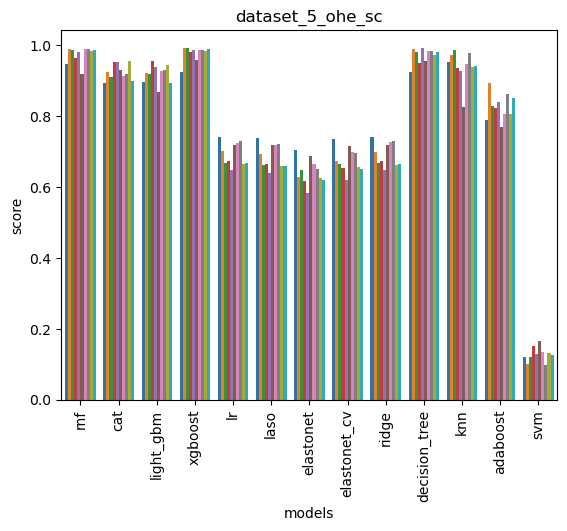

In [56]:
b = sns.barplot(x='models', y='value', hue = 'variable', data=cv_scores_df_melt )
b.set_xticklabels(b.get_xticklabels(), rotation=90);
b.set_ylabel('score')
b.legend_.remove()
b.set_title('dataset_5_ohe_sc')

Text(0.5, 1.0, 'dataset_5_ohe_sc')

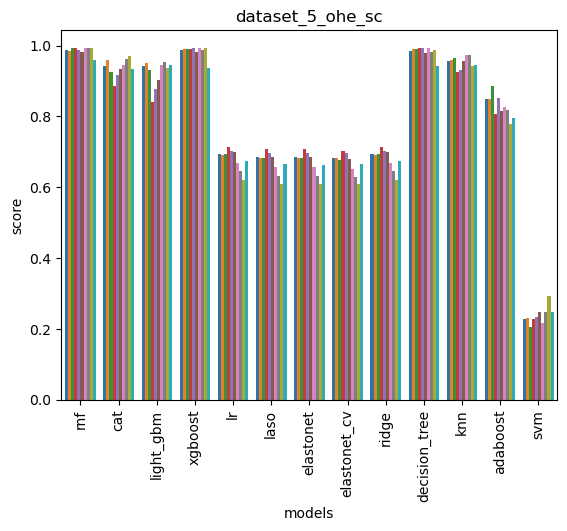

In [46]:
#all conc data
b = sns.barplot(x='models', y='value', hue = 'variable', data=cv_scores_df_melt )
b.set_xticklabels(b.get_xticklabels(), rotation=90);
b.set_ylabel('score')
b.legend_.remove()
b.set_title('dataset_5_ohe_sc')